In [1]:
%%html
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async src="https://www.googletagmanager.com/gtag/js?id=UA-162045285-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-162045285-1');
</script>


# Covid-19 Analysis

## Presentazione del Report
Analisi della situazione italiana del Covid-19 basata sui dati della Protezione Civile. I dati sono aggiornati alle 18.30 e sono recuperati dal repository https://github.com/pcm-dpc/COVID-19. Per aggiornare i dati rilanciare il presente Notebook.

> Questo Report è stato sviluppando usando Jupyter Lab un tool che permette la scrittura di codice Python tramite Browser. 
Il codice sorgente è disponibile all'indirizzo https://github.com/pasalino/Covid-19-PyAnalysis .

> **Sono gradite le Star (stelline in alto a destra della pagina).** <br/>
> Sono graditi commenti e suggerimenti che potete inviare all'indirizzo pasalino@gmail.com oppure sulla pagina https://github.com/pasalino/Covid-19-PyAnalysis/issues .<br/>
> Qui tutte le nuove funzionalità e la Roadmap del report https://pasalino.github.io/Covid-19-PyAnalysis



## Disclosure e scarico di responsabilità

Questo report non vuole sostituirsi alle fonti ufficiali, ma ne va a completamento. Non consideratelo una fonte ufficiale ma una lettura dei dati ufficiali da un punto di vista matematico.
Non mi ritengo responsabile della diffusione di questo report se non nei limiti delal condivisione di pensiero atta a comprendere meglio i dati. I dati in questo report, non sono analizzati da esperti di settore e quindi proni ad errori.
Potrebbero esserci errori e inesattezze nel codice che produce i dati. Attraverso la pagina sopra indicata è possibile indicarle.

## Indice

In [2]:
%%html
<div id="toc"></div>

In [3]:
%%javascript
$( document ).ready(function() {
    const l = $("<a href='#Indice' class='link_index'> ^ Torna su</a>");
    l.insertAfter('h2');
    l.insertAfter('h3');
    l.insertAfter('h4');
    console.log( "ready!" );
});

<IPython.core.display.Javascript object>

In [4]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [5]:
import os
import subprocess
import pandas as pd 
import datetime
import matplotlib
import math
import numpy as np
from scipy import stats
from IPython.display import display, Markdown, Latex
from matplotlib import pyplot as plt
from matplotlib.dates import date2num

In [6]:
PROTEZIONE_CIVILE_REPO = 'git@github.com:pcm-dpc/COVID-19.git'
CURRENT_DIR = os.path.join(os.getcwd())
DATA_DIR = os.path.join(os.getcwd(),'data')
REPO_DIR = os.path.join(os.getcwd(),DATA_DIR,'repo')

In [7]:
COLORS = ['tomato', 'seagreen', 'magenta', 'deepskyblue', 'plum', 'orange', 'royalblue',]
COL_TOTALE_CASI = '#1376f7'
COL_ATTUALMENTE_POSITIVI = '#d30202'
COL_DECEDUTI = '#8D09B3'
COL_DIFF_POSITIVI = '#d11212'
COL_GUARITI = 'deepskyblue'
COL_TOT_RICOVERATI = '#FF352D'
COL_ISOLAMENTO_DOMICILIARE = '#FDCEB5'
COL_TERAPIA_INTENSIVA = "#B34220"
COL_RICOVERATI ='#FF7554'
COL_TAMPONI= '#bce079'

COL_AVG= 'green'

NAME_LABELS= {
    'data':'DATA', 
    'ricoverati_con_sintomi':'RICOVERATI', 
    'terapia_intensiva':'TERAPIA INT.',
    'totale_ospedalizzati':'TOT. RICOV.',
    'isolamento_domiciliare':'ISOLAME. DOM.',
    'totale_attualmente_positivi':'TOT. POSITIVI',
    'nuovi_attualmente_positivi':'DIFF. POSITIVI',
    'totale_nuovi_positivi':'TOT. NUOVI POS.',
    'dimessi_guariti':'GUARITI',
    'deceduti':'DECEDUTI',
    'totale_casi':'CASI TOTALI',
    'tamponi':'TAMPONI'    
}

In [8]:
if not os.path.isdir(REPO_DIR):
    p = subprocess.Popen(['git', 'clone', '--single-branch', '-b', 'master', PROTEZIONE_CIVILE_REPO, REPO_DIR])
    p.wait()
else:
    os.chdir(REPO_DIR)
    p = subprocess.Popen(['git', 'pull'])
    p.wait()
    os.chdir(REPO_DIR)
    os.chdir(CURRENT_DIR)

## Articoli di interesse per capire i numeri

* Articolo de Il Sole 24Ore che da un senso ai numeri indicati dalla protezione civile [QUI](https://www.ilsole24ore.com/art/gli-attualmente-contagiati-e-nuovi-positivi-rebus-ogni-sera-ADGG5tF)
* Articolo del Corriere della Sera che ci da una previsione secondo Einaudi Institute for Economincs and Finance (non di settore ma nemmeno degli sprovveduti [QUI](https://www.corriere.it/economia/lavoro/20_marzo_30/coronavirus-italia-quando-si-azzereranno-contagi-previsioni-regione-regione-ae9099dc-7264-11ea-bc49-338bb9c7b205.shtml). 
* Articolo in cui l'Intelligenza Artificiale prova a stimare la fine dell'epidemia [QUI](https://it-blastingnews-com.cdn.ampproject.org/c/s/it.blastingnews.com/cronaca/2020/03/in-casa-fino-a-meta-giugno-a-lavoro-da-settembre-lintelligenza-artificiale-da-le-nuove-previsioni-003100255.amp.html)

## Legenda

* **CASI TOTALI**: Il numero di casi totali riscontrati rispetto al giorno giorno prima. Include guariti e morti
* **DIFF. POSITIVI**: Il numero di casi che sono la differenza dei totali riscontrati in quel giorno meno i guariti e i morti (vedi l'articolo de Il Sole 24ore per capire)
* **ATTUALMENTE POSITIVI**: Il numero dei casi che sono attualmente contagiati

## Ultimo aggiornamento dei dati dalla protezione civile
Questa data è l'ultimo aggiornamento ai dati della protezione civile a cui si riferisce questo Report

In [9]:
os.chdir(REPO_DIR)
p = subprocess.Popen(['git', 'log', '-1', '--format=%cd'], stdout=subprocess.PIPE)
p.wait()
stdout = p.communicate()[0]
out = stdout.decode("utf-8").strip()
display(Markdown(f'**' + out + '**'))
os.chdir(CURRENT_DIR)

**Wed Sep 2 18:49:35 2020 +0200**

In [10]:
plt.rcParams['figure.figsize'] = [20, 7]

In [11]:
def beautify_graph(ax):
    ax.legend(loc="upper left")
    ax.set_xlabel('Date')
    ax.grid(b=True, which='major', color='#888888', linestyle=':')
    ax.minorticks_on()
    ax.grid(b=True, which='minor', color='#AAAAAA', linestyle=':', alpha=0.5)
    ax.tick_params(which='both', width=1)
    ax.tick_params(which='both', length=14)
    #ax.locator_params(axis='x', nbins=10)
    ax.tick_params(axis="x", which='minor', length=0, color='gray')
    ax.tick_params(axis="y", which='minor', length=8, color='gray')
    
def show_table(df, tail=1):
    if 'DATA' in df.columns:
        df = df.drop('DATA',axis=1)
    if 'data' in df.columns:
        df = df.drop('data',axis=1)
    return df.rename(columns = NAME_LABELS).tail(tail)

def interpolation(data):
    slope, intercept, r_value, p_value, std_err = stats.linregress(range(len(data)), data)
    x_max= math.floor(-intercept/slope)
    x_int=[0, x_max]
    y_int=[intercept, x_max * slope + intercept]
    
    start_date = datetime.datetime.strptime(data.index[0],'%d-%b-%y')
    x_label = [datetime.datetime.strftime(start_date + datetime.timedelta(days = x),'%d-%b-%y') for x in range(x_max)]
    series = data.tolist() + [0 for x in range(x_max-len(data))]
    
    return x_int, y_int, x_label, series

def xinterpolate(serie):
    X_mean = len(serie)/2
    Y_mean = np.mean(serie)
    num = 0
    den = 0
    for i in range(1, len(serie)):
        num += (i - X_mean)*(serie[i] - Y_mean)
        den += (i - X_mean)**2
    m = num / den
    c = Y_mean - m*X_mean
    x_max= abs(c/m)
    return[1, x_max], [m+c, m*x_max+c]
    #return c,m
    
def xinterpolate_2(serie):
    X_mean = len(serie)/2
    Y_mean = np.mean(serie)
    num = 0
    den = 0
    for i in range(1, len(serie)):
        num += (i - X_mean)*(serie[i] - Y_mean)
        den += (i - X_mean)**2
    m = num / den
    c = Y_mean - m*X_mean
    #x_max= abs(c/m)
    return c,m


## Dati Nazionali

In [12]:
national_trend_read = pd.read_csv(os.path.join(REPO_DIR,'dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'))
national_trend_read['totale_attualmente_positivi'] = national_trend_read['totale_positivi']
national_trend_read['nuovi_attualmente_positivi'] = national_trend_read['variazione_totale_positivi']
national_trend = pd.DataFrame()
national_trend['DATA'] = pd.to_datetime(national_trend_read['data']).dt.strftime('%d-%b-%y')
national_trend['data'] = pd.to_datetime(national_trend_read['data']).dt.strftime('%d-%b-%y')

national_columns = ['totale_casi','totale_attualmente_positivi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'tamponi']
for n in national_columns:
    national_trend[n] = national_trend_read[n]

national_trend.set_index(keys=['DATA'], append=False, inplace=True)
national_trend.index.rename('', inplace=True)

### I dati di oggi

In [13]:
incremental_data = pd.DataFrame()
incremental_columns = ['data','totale_casi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'totale_attualmente_positivi','tamponi']

for c in incremental_columns:
    if c in ['nuovi_attualmente_positivi','data']:
        incremental_data[c] = national_trend[c]
    else:
        incremental_data[c] = national_trend[c] - national_trend[c].shift(1)
        incremental_data[c] = incremental_data[c].astype(pd.Int64Dtype())
    
incremental_data['CASI PER TAMPONE (%)']= (incremental_data['totale_casi']/incremental_data['tamponi']*100).round(2)

complete_incremental_data = incremental_data
incremental_data = incremental_data[1:]

In [14]:
show_table(incremental_data)

CASI TOTALI  DIFF. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                         
02-Sep-20         1326            1063      257         6           59   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TOT. POSITIVI  TAMPONI  \
                                                                             
02-Sep-20          57             2           1004           1063   102959   

           CASI PER TAMPONE (%)  
                                 
02-Sep-20                  1.29

### I dati cumulati di oggi

In [15]:
show_table(national_trend).drop('DIFF. POSITIVI', axis=1)

CASI TOTALI  TOT. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                        
02-Sep-20       271515          27817   208201     35497         1546   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
                                                             
02-Sep-20        1437           109          26271  8828868

#### Grafico della progressione giornaliera
Ogni punto indica il numero di casi evidenziati in quel giorno

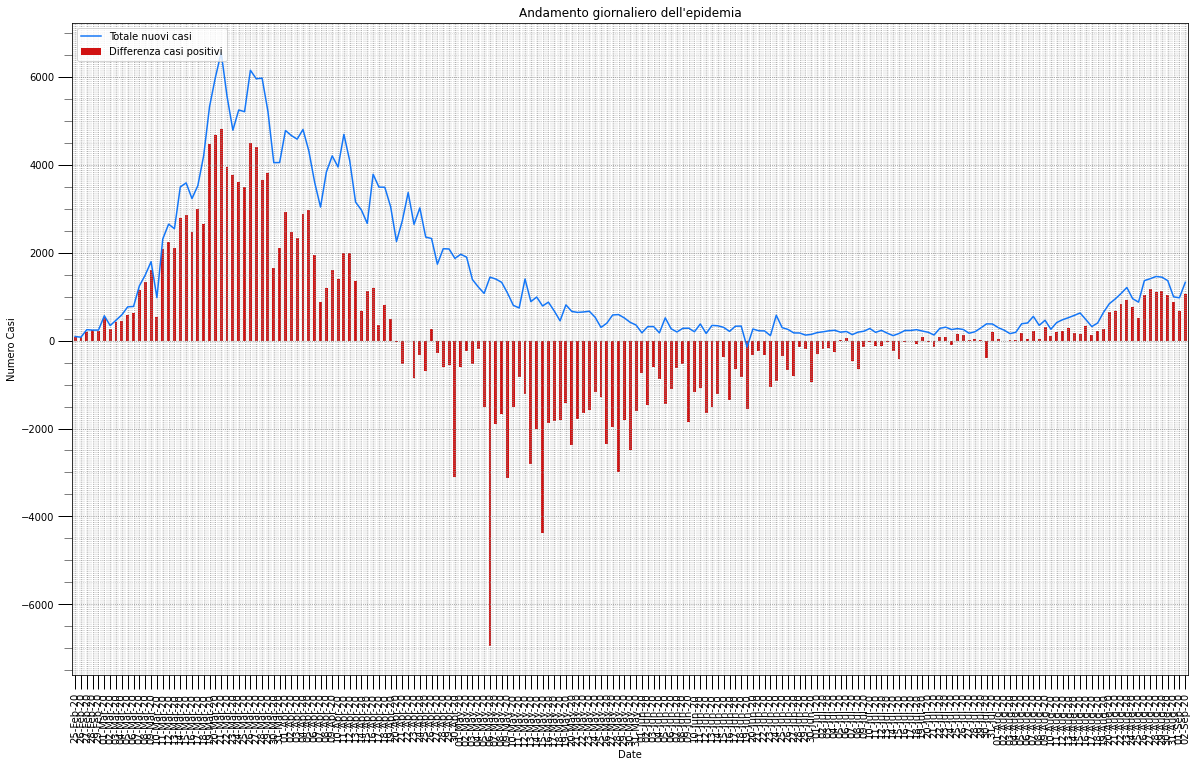

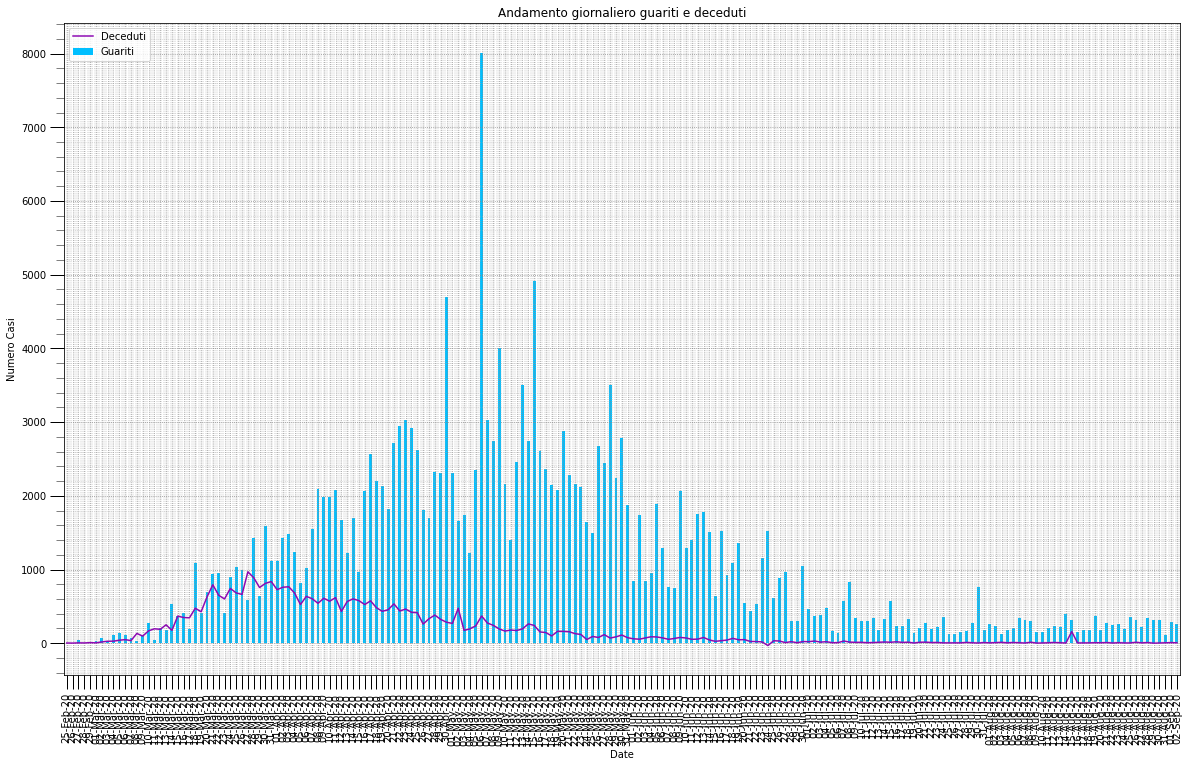

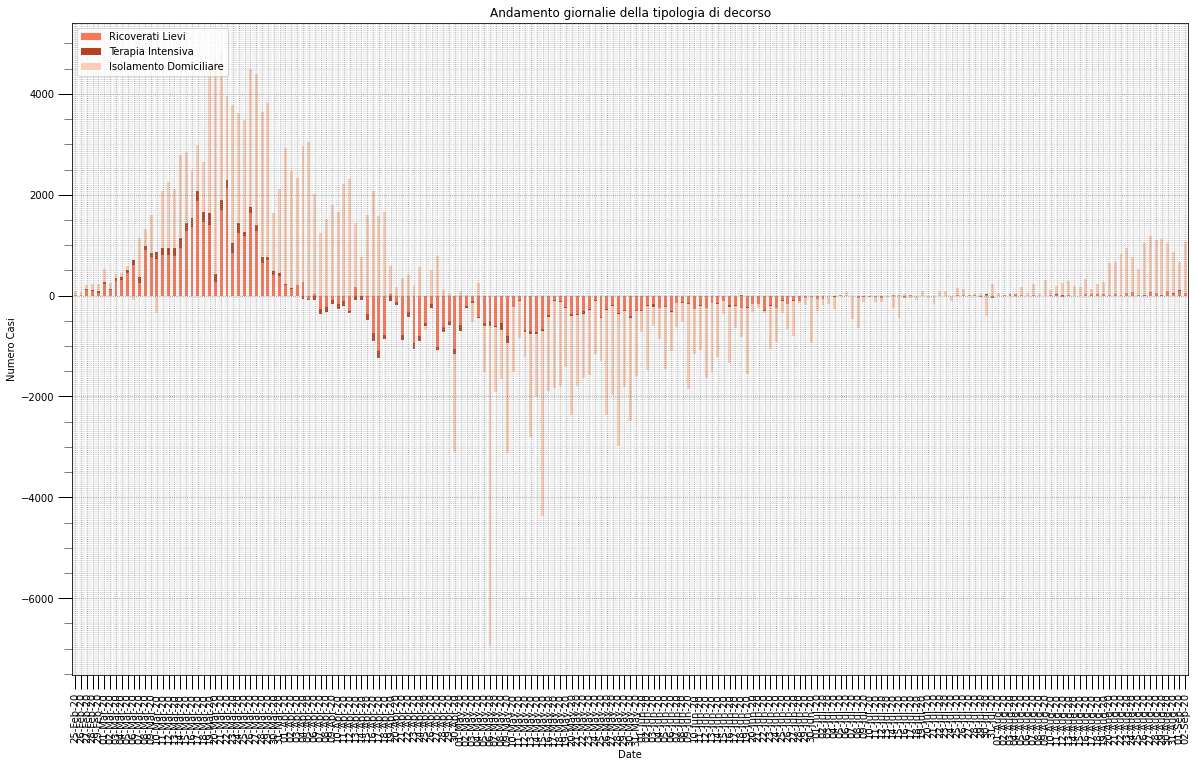

In [16]:
plt.rcParams['figure.figsize'] = [20, 12]
plot =['totale_casi']
legends = ["Totale nuovi casi"]
colors = [COL_TOTALE_CASI]
ax = incremental_data.plot(kind='line', x='data', y=plot, color=colors, rot=90, label=legends)
ax.set_ylabel('Numero Casi')
ax.set_title("Andamento giornaliero dell'epidemia")
beautify_graph(ax)


plot =['nuovi_attualmente_positivi']
legends = ["Differenza casi positivi"]
colors = [COL_DIFF_POSITIVI, COL_GUARITI, COL_DECEDUTI]
ay = incremental_data.plot(kind='bar', x='data', y=plot, color=colors, rot=90, label=legends,  ax=ax)
beautify_graph(ay)



plot =['deceduti']
legends = ["Deceduti"]
colors = [COL_DECEDUTI]
ax = incremental_data.plot(kind='line', x='data', y=plot, color=colors, rot=90, label=legends)
ax.set_ylabel('Numero Casi')
beautify_graph(ax)

plot =['dimessi_guariti']
legends = ["Guariti"]
colors = [COL_GUARITI, ]
ay = incremental_data.plot(kind='bar', x='data', y=plot, color=colors, rot=90, label=legends, ax=ax)
ay.set_title("Andamento giornaliero guariti e deceduti")
beautify_graph(ay)

#legends = ["Totale ospedalizzati"]
#colors = [COL_TOT_RICOVERATI]
#aw = incremental_data.plot(kind='line', x='data', y=['totale_ospedalizzati'], color=[COL_TOT_RICOVERATI], rot=90, label=legends)

plot =['ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare',]
legends = ["Ricoverati Lievi","Terapia Intensiva","Isolamento Domiciliare"]
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE]
az = incremental_data.plot(kind='bar', x='data', y=plot, color=colors, rot=90, stacked=True, label=legends)
az.set_title("Andamento giornalie della tipologia di decorso")
az.set_ylabel('Numero Casi')
beautify_graph(az)



#### I dati incrementali degli ultimi 10 giorni

In [17]:

show_table(incremental_data.rename(columns=NAME_LABELS),10).drop('TOT. POSITIVI', axis=1)

CASI TOTALI  DIFF. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                         
24-Aug-20          953             757      192         4           70   
25-Aug-20          876             519      353         4           14   
26-Aug-20         1366            1039      314        13            0   
27-Aug-20         1409            1179      225         5           74   
28-Aug-20         1460            1103      348         9           54   
29-Aug-20         1444            1121      322         1           -5   
30-Aug-20         1365            1049      312         4           90   
31-Aug-20          996             873      117         6           45   
01-Sep-20          975             676      291         8          105   
02-Sep-20         1326            1063      257         6           59   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  \
                                                              
24-Aug-20          74            -4            687    45914   
25-Aug-20          13             1            505    72341   
26-Aug-20          -3             3           1039    93529   
27-Aug-20          76            -2           1105    94024   
28-Aug-20          47             7           1049    97065   
29-Aug-20         -10             5           1126    99108   
30-Aug-20          83             7            959    76723   
31-Aug-20          37             8            828    58518   
01-Sep-20          92            13            571    81050   
02-Sep-20          57             2           1004   102959   

           CASI PER TAMPONE (%)  
                                 
24-Aug-20                  2.08  
25-Aug-20                  1.21  
26-Aug-20                  1.46  
27-Aug-20                  1.50  
28-Aug-20                  1.50  
29-Aug-20                  1.46  
30-Aug-20                  1.78  
31-Aug-20                  1.70  
01-Sep-20                  1.20  
02-Sep-20                  1.29

#### I dati cumulati degli ultimi 10 giorni

In [18]:
show_table(national_trend.rename(columns = NAME_LABELS),10).drop('DIFF. POSITIVI', axis=1)

CASI TOTALI  TOT. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                        
24-Aug-20       260298          19195   205662     35441         1110   
25-Aug-20       261174          19714   206015     35445         1124   
26-Aug-20       262540          20753   206329     35458         1124   
27-Aug-20       263949          21932   206554     35463         1198   
28-Aug-20       265409          23035   206902     35472         1252   
29-Aug-20       266853          24156   207224     35473         1247   
30-Aug-20       268218          25205   207536     35477         1337   
31-Aug-20       269214          26078   207653     35483         1382   
01-Sep-20       270189          26754   207944     35491         1487   
02-Sep-20       271515          27817   208201     35497         1546   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
                                                             
24-Aug-20        1045            65          18085  8053551  
25-Aug-20        1058            66          18590  8125892  
26-Aug-20        1055            69          19629  8219421  
27-Aug-20        1131            67          20734  8313445  
28-Aug-20        1178            74          21783  8410510  
29-Aug-20        1168            79          22909  8509618  
30-Aug-20        1251            86          23868  8586341  
31-Aug-20        1288            94          24696  8644859  
01-Sep-20        1380           107          25267  8725909  
02-Sep-20        1437           109          26271  8828868

### Andamento Nazionale
I dati cumulati nei giorni. Ci da idea di come sta evolvendo l'epidemia.

Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.3999999999992

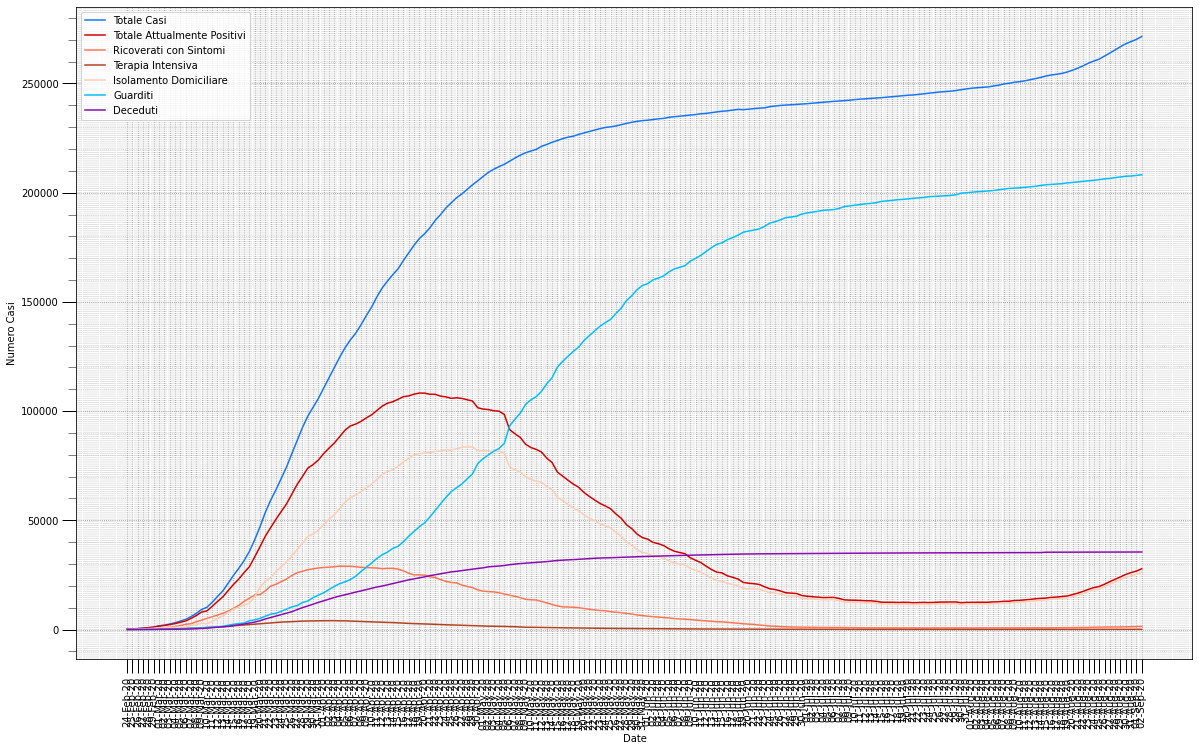

In [19]:
plt.rcParams['figure.figsize'] = [20, 12]
fig, ax = plt.subplots()

plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i in range(0,len(plot)):
    plt.plot(national_trend['data'], national_trend[plot[i]], color=colors[i], label=legends[i])

ax.set_xticklabels(national_trend['data'], rotation=90)
ax.set_ylabel('Numero Casi')

beautify_graph(ax)

Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.3999999999992

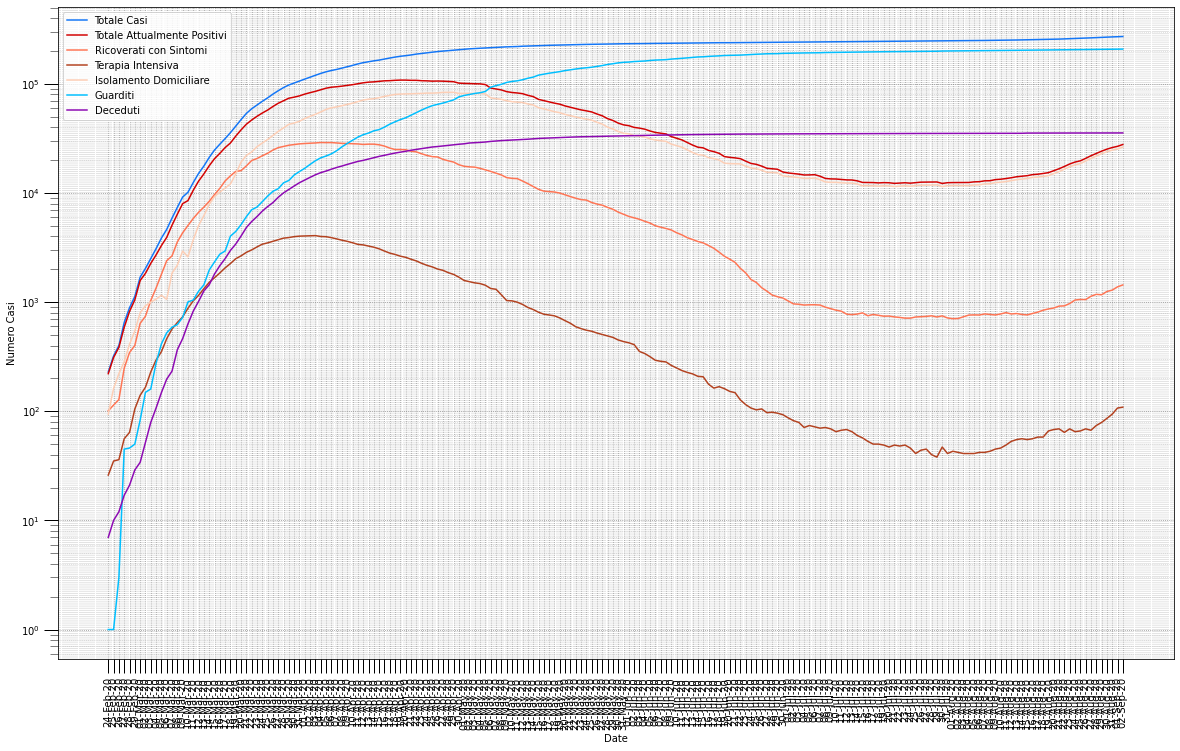

In [20]:

fig, ax = plt.subplots()
plt.yscale('log')
plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i in range(0,len(plot)):
    plt.plot(national_trend['data'], national_trend[plot[i]], color=colors[i], label=legends[i])

ax.set_xticklabels(national_trend['data'], rotation=90)
ax.set_ylabel('Numero Casi')

beautify_graph(ax)


### Percentuale di crescita
Le percentuali di crescita sono valori che danno idea rispetto al giorno precedente di come si muove l'epidemia.
Questi valori a causa del numero molto elevato di contagi è normale che scendano.

In [21]:
plt.rcParams['figure.figsize'] = [20, 7]
growth_rates = pd.DataFrame()
growth_rates['data'] = national_trend['data']
growth_rates_columns = ['totale_casi','nuovi_attualmente_positivi', 'totale_attualmente_positivi', 'dimessi_guariti', 'deceduti', 'totale_ospedalizzati', 'ricoverati_con_sintomi', 'terapia_intensiva', 'isolamento_domiciliare',  'tamponi']

for c in growth_rates_columns:
    growth_rates[c] = (national_trend[c] - national_trend[c].shift(1))/abs(national_trend[c].shift(1))*100
growth_rates= growth_rates.round(2)
growth_rates=growth_rates[1:]

In [22]:
show_table(growth_rates.rename(columns=NAME_LABELS),7)

CASI TOTALI  DIFF. POSITIVI  TOT. POSITIVI  GUARITI  DECEDUTI  \
                                                                           
27-Aug-20         0.54           13.47           5.68     0.11      0.01   
28-Aug-20         0.55           -6.45           5.03     0.17      0.03   
29-Aug-20         0.54            1.63           4.87     0.16      0.00   
30-Aug-20         0.51           -6.42           4.34     0.15      0.01   
31-Aug-20         0.37          -16.78           3.46     0.06      0.02   
01-Sep-20         0.36          -22.57           2.59     0.14      0.02   
02-Sep-20         0.49           57.25           3.97     0.12      0.02   

           TOT. RICOV.  RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
                                                                          
27-Aug-20         6.58        7.20         -2.90           5.63     1.14  
28-Aug-20         4.51        4.16         10.45           5.06     1.17  
29-Aug-20        -0.40       -0.85          6.76           5.17     1.18  
30-Aug-20         7.22        7.11          8.86           4.19     0.90  
31-Aug-20         3.37        2.96          9.30           3.47     0.68  
01-Sep-20         7.60        7.14         13.83           2.31     0.94  
02-Sep-20         3.97        4.13          1.87           3.97     1.18

### Trends e medie
Uno spaccato di alcuni dati.
Viene visualizzato anche il trend medio settimanale.
GR = Growth Rate - Fattore di crescita

In [23]:
avg_trend = pd.DataFrame()
avg_trend['data'] = national_trend['data']

avg_trend['totale_casi'] = national_trend['totale_casi']
avg_trend['totale_casi_percent'] = growth_rates['totale_casi']
avg_trend['avg_totale'] = growth_rates['totale_casi'].rolling(7).mean().round(2)

avg_trend['attualmente_positivi'] = national_trend['totale_attualmente_positivi']
avg_trend['attualmente_positivi_percent'] = (avg_trend['attualmente_positivi'] - avg_trend['attualmente_positivi'].shift(1))/abs(avg_trend['attualmente_positivi']).shift(1)*100
avg_trend['attualmente_positivi_percent']= avg_trend['attualmente_positivi_percent'].round(2)
avg_trend['avg_att_positivi'] = avg_trend['attualmente_positivi_percent'].rolling(7).mean().round(2)

avg_trend['dimessi_guariti'] = national_trend['dimessi_guariti']
avg_trend['dimessi_guariti_percent'] = growth_rates['dimessi_guariti']
avg_trend['avg_dimessi_guariti'] = growth_rates['dimessi_guariti'].rolling(7).mean().round(2)

avg_trend['deceduti'] = incremental_data['deceduti']
avg_trend['deceduti_percent'] = growth_rates['deceduti']
avg_trend['avg_deceduti'] = growth_rates['deceduti'].rolling(7).mean().round(2)

avg_trend['tamponi'] = incremental_data['tamponi']
avg_trend['tamponi_percent'] = growth_rates['tamponi']
avg_trend['avg_tamponi'] = growth_rates['tamponi'].rolling(7).mean().round(2)

* **CASI TOTALI GR**: Quando questo numero sarà zero, l'epidemia si sarà fermata e dovremmo aspettare che tutti siano guariti (Sperando che nessuno infetti altri).
* **NUOVI CASI TOTALI GR**: Quando questo numero sarà zero, non ci saranno più nuovi contagi e dovremo solo aspettare che tutti guardiscano
* **GUARITI GR**: Quanto indica quanti guariti rispetto al giorno prima ci sono. Più è alto, più guarisce velocemente. 
* **DECEDUTI**: Questo numero indica di quanto aumentano i morti rispetto al giorno prima. 

In [24]:
LABELS = {
    'nuovi_attualmente_positivi_casi': 'NUOVI CASI', 'nuovi_attualmente_positivi_percent': 'GR(%)', 'avg_nuovi': 'MEDIA 7GG (%)',
    'attualmente_positivi': 'TOT. ATTUALMENT. POS.',
    'attualmente_positivi_percent': 'GR(%)', 'avg_att_positivi': 'MEDIA 7GG (%)',
    'tamponi_percent': 'GR(%)', 'avg_tamponi': 'MEDIA 7GG (%)',
    'deceduti_percent': 'GR(%)', 'avg_deceduti':'MEDIA 7GG (%)',
    'totale_casi_percent': 'GR(%)', 'avg_totale':'MEDIA 7GG (%)',
    'dimessi_guariti_percent':'GR(%)', 'avg_dimessi_guariti':'MEDIA 7GG (%)',
}
show_table(avg_trend,5).rename(columns=LABELS)

CASI TOTALI  GR(%)  MEDIA 7GG (%)  TOT. ATTUALMENT. POS.  GR(%)  \
                                                                             
29-Aug-20       266853   0.54           0.48                  24156   4.87   
30-Aug-20       268218   0.51           0.48                  25205   4.34   
31-Aug-20       269214   0.37           0.48                  26078   3.46   
01-Sep-20       270189   0.36           0.48                  26754   2.59   
02-Sep-20       271515   0.49           0.48                  27817   3.97   

           MEDIA 7GG (%)  GUARITI  GR(%)  MEDIA 7GG (%)  DECEDUTI  GR(%)  \
                                                                           
29-Aug-20           4.71   207224   0.16           0.14         1   0.00   
30-Aug-20           4.57   207536   0.15           0.14         4   0.01   
31-Aug-20           4.48   207653   0.06           0.14         6   0.02   
01-Sep-20           4.46   207944   0.14           0.13         8   0.02   
02-Sep-20           4.28   208201   0.12           0.13         6   0.02   

           MEDIA 7GG (%)  TAMPONI  GR(%)  MEDIA 7GG (%)  
                                                         
29-Aug-20           0.02    99108   1.18           0.99  
30-Aug-20           0.02    76723   0.90           1.00  
31-Aug-20           0.02    58518   0.68           1.02  
01-Sep-20           0.02    81050   0.94           1.02  
02-Sep-20           0.02   102959   1.18           1.03

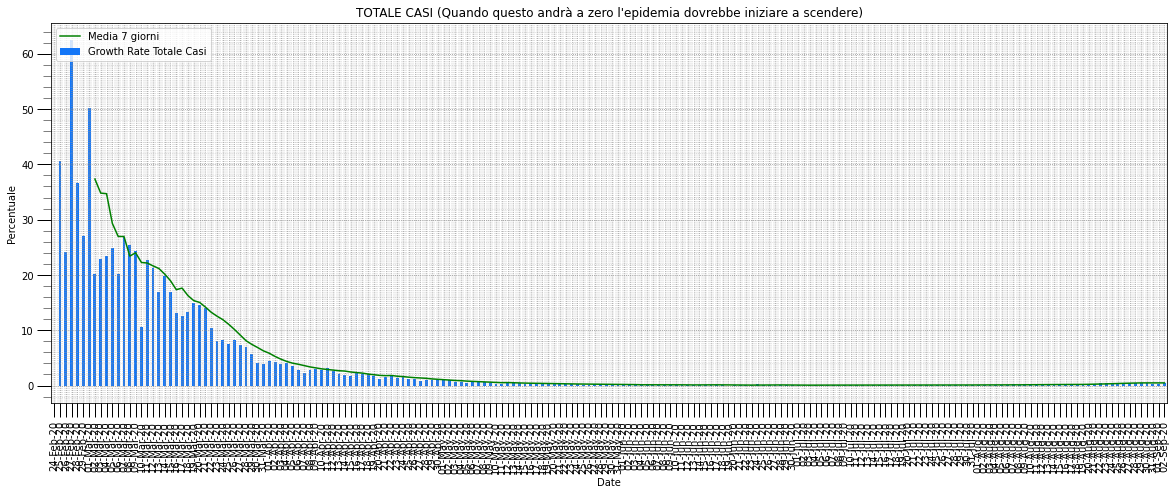

In [25]:
fig, ax = plt.subplots()
ay = avg_trend.plot(kind='line', x='data', y=['avg_totale'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
#plt.plot(inter[0], inter[1], color='tomato', label='Predizione') 
avg_trend.plot(kind='bar', x='data', y=['totale_casi_percent'], color=[COL_TOTALE_CASI], label=['Growth Rate Totale Casi'], ax=ay)

ax.set_title("TOTALE CASI (Quando questo andrà a zero l'epidemia dovrebbe iniziare a scendere)")
ax.set_ylabel('Percentuale')
beautify_graph(ax)

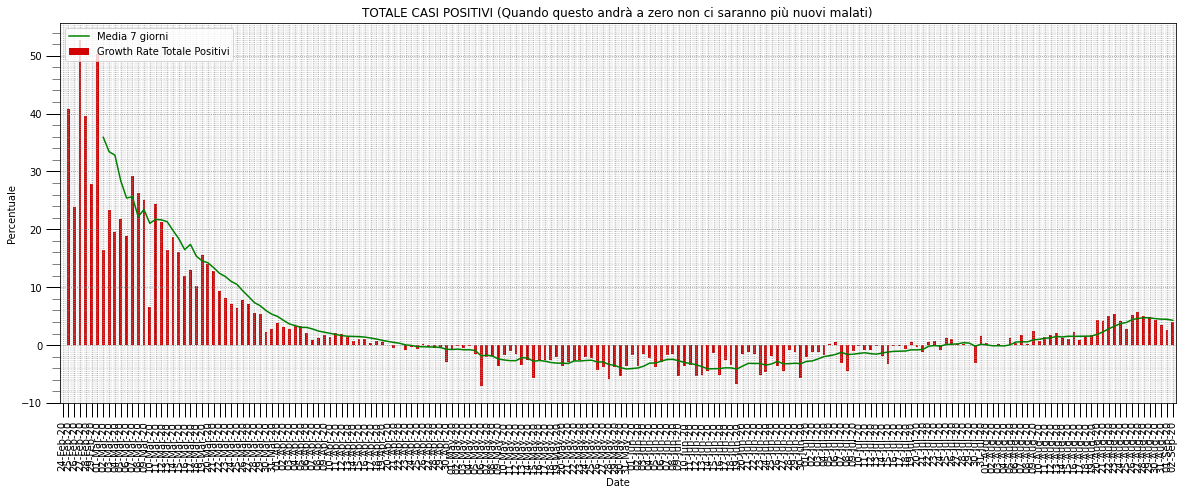

In [26]:
fig, ax = plt.subplots()

#ax.bar(x, series+fill, color=[COL_ATTUALMENTE_POSITIVI], label='Growth Rate Totale Positivi')
ay = avg_trend.plot(kind='line', x='data', y=['avg_att_positivi'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
#plt.plot(inter[0], inter[1], color='tomato', label='Predizione') 
avg_trend.plot(kind="bar", x='data', y=['attualmente_positivi_percent'], color=[COL_ATTUALMENTE_POSITIVI], label=['Growth Rate Totale Positivi'], ax=ay)

ax.set_title("TOTALE CASI POSITIVI (Quando questo andrà a zero non ci saranno più nuovi malati)")
ax.set_ylabel('Percentuale')

beautify_graph(ax)


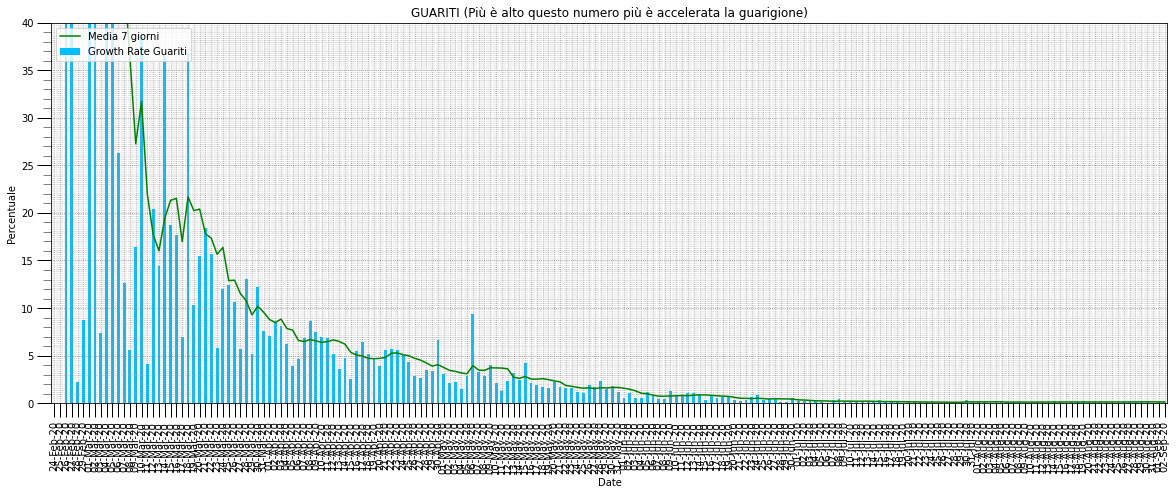

In [27]:
fig, ax = plt.subplots()
plot = ['dimessi_guariti_percent']

labels = ['Growth Rate Guariti']
ay = avg_trend.plot(kind='bar', x='data', y=plot, color=[COL_GUARITI], rot=90, label=labels, ax=ax)

plot = ['avg_dimessi_guariti']
labels = ['Media 7 giorni']
ay = avg_trend.plot(kind='line', x='data', y=plot, color=[COL_AVG], rot=90, label=labels, ax=ax)

ax.set_title("GUARITI (Più è alto questo numero più è accelerata la guarigione)")
ax.set_ylabel('Percentuale')
ax.set_ylim(0,40)
beautify_graph(ax)

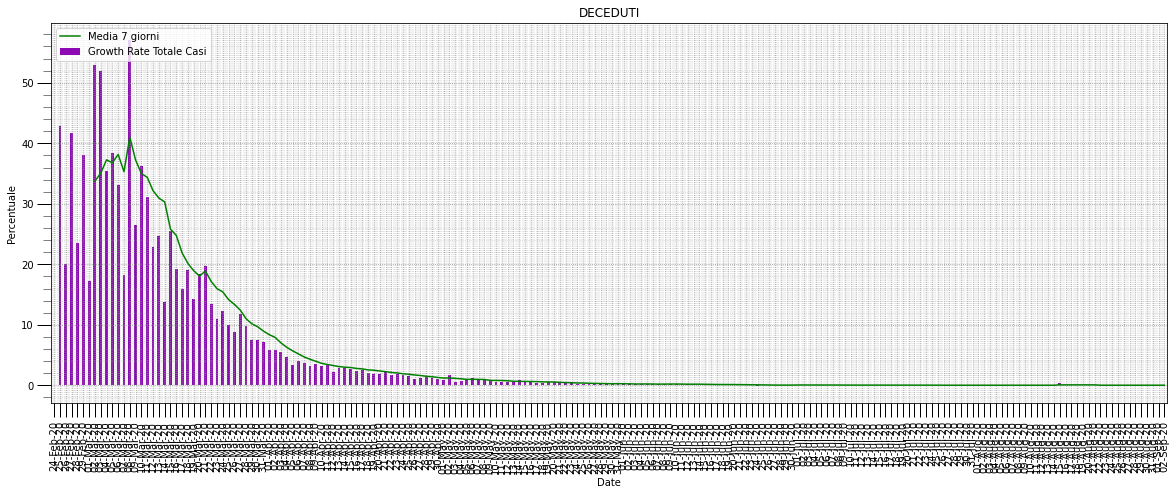

In [28]:
fig, ax = plt.subplots()

ay = avg_trend.plot(kind='line', x='data', y=['avg_deceduti'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
avg_trend.plot(kind='bar', x='data', y=['deceduti_percent'], color=[COL_DECEDUTI], label=['Growth Rate Totale Casi'], ax=ay)

ax.set_title("DECEDUTI")
ax.set_ylabel('Percentuale')
beautify_graph(ax)

## Velocità epidemia (Growth Factor)

Calcolo della derivata. La derivata ci dà l'idea della velocità e della direzione della curva epidemica. Se il valore è uguale a 1 la crescita è lineare (ogni giorno cresce dello stesso numero di persone è come andare a una velocità fissa di 50KM orari). Un fattore maggiore di 1 indica che la crescita aumenta la sua velocità (l'epidemia schiaccia sull'acceleratore), un valore inferiore a 1 indica l'epidemia rallenta la sua velocità (l'epidemaia ha schiacciato il freno). Una fattore uguale a zero significa che è stabile. 

In [29]:
max_tamponi = incremental_data['tamponi'].max()


In [30]:
gf = pd.DataFrame()
gf['data'] = national_trend['data']
gf['totale_casi'] = national_trend['totale_casi']
gf['diff'] = gf['totale_casi'] - gf['totale_casi'].shift(1)
gf['gr'] = ((gf['diff'] / abs(gf['diff'].shift(1)))).round(3)
gf['avg_gf'] = gf['gr'].rolling(7).mean().round(3)
gf['avg_gf_15'] = gf['gr'].rolling(15).mean().round(3)


gf['tamponi'] =national_trend['tamponi']
gf['diff_tamp'] =national_trend['tamponi']-national_trend['tamponi'].shift(1)
gf['totale_casi'].shift(1) * max_tamponi /(national_trend['tamponi'].shift(1) -national_trend['tamponi'].shift(2))
gf['gr_tamp'] = ((gf['diff_tamp'] / abs(gf['diff_tamp'].shift(1)))).round(3)
gf['avg_gf_tamp'] = gf['gr_tamp'].rolling(7).mean().round(3)
gf['avg_gf_tamp_15'] = gf['gr_tamp'].rolling(15).mean().round(3)

gf['totale_attualmente_positivi'] = national_trend['totale_attualmente_positivi']
gf['diff_att_pos'] = gf['totale_attualmente_positivi'] - gf['totale_attualmente_positivi'].shift(1)

gf['gr_att_pos'] = ((gf['diff_att_pos'] / abs(gf['diff_att_pos'].shift(1)))).round(3)
gf['avg_att_pos'] = gf['gr_att_pos'].rolling(7).mean().round(3)
gf['avg_att_pos_15'] = gf['gr_att_pos'].rolling(15).mean().round(3)


show_table(gf, 7)\
    .drop('diff', axis=1)\
    .drop('diff_tamp', axis=1)\
    .rename(columns=
       {'gr': 'GROWTH FACTOR NUOVI', 
        'avg_gf': 'MEDIA 7GG',
        'avg_gf_3': 'MEDIA 3GG',
        'avg_gf_15': 'MEDIA 15GG',
        'gr_att_pos': 'GROWTH FACTOR ATT. POS.',
        'avg_att_pos_3': 'MEDIA 3GG',
        'avg_att_pos': 'MEDIA 7GG',
        'avg_att_pos_15': 'MEDIA 15GG',
        'gr_tamp': 'GROWTH FACTOR TAMPONI',
        'avg_gf_tamp_15': 'MEDIA 15GG',
        'avg_gf_tamp': 'MEDIA 7GG'
       })


CASI TOTALI  GROWTH FACTOR NUOVI  MEDIA 7GG  MEDIA 15GG  TAMPONI  \
                                                                              
27-Aug-20       263949                1.031      1.098       1.105  8313445   
28-Aug-20       265409                1.036      1.085       1.100  8410510   
29-Aug-20       266853                0.989      1.064       1.093  8509618   
30-Aug-20       268218                0.945      1.038       1.083  8586341   
31-Aug-20       269214                0.730      1.030       1.081  8644859   
01-Sep-20       270189                0.979      1.038       1.102  8725909   
02-Sep-20       271515                1.360      1.010       1.109  8828868   

           GROWTH FACTOR TAMPONI  MEDIA 7GG  MEDIA 15GG  TOT. POSITIVI  \
                                                                         
27-Aug-20                  1.005      1.062       1.076          21932   
28-Aug-20                  1.032      1.076       1.080          23035   
29-Aug-20                  1.021      1.068       1.088          24156   
30-Aug-20                  0.774      1.055       1.063          25205   
31-Aug-20                  0.763      1.066       1.068          26078   
01-Sep-20                  1.385      1.039       1.105          26754   
02-Sep-20                  1.270      1.036       1.072          27817   

           diff_att_pos  GROWTH FACTOR ATT. POS.  MEDIA 7GG  MEDIA 15GG  
                                                                         
27-Aug-20        1179.0                    1.135      1.146       1.239  
28-Aug-20        1103.0                    0.936      1.135       1.217  
29-Aug-20        1121.0                    1.016      1.103       1.246  
30-Aug-20        1049.0                    0.936      1.074       1.246  
31-Aug-20         873.0                    0.832      1.078       1.163  
01-Sep-20         676.0                    0.774      1.090       1.187  
02-Sep-20        1063.0                    1.572      1.029       1.182

Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]),

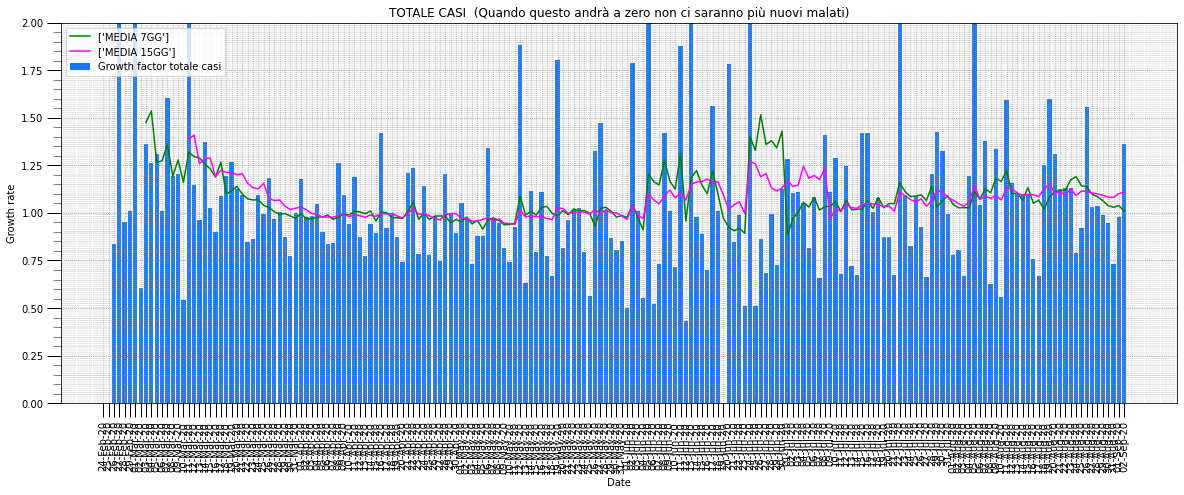

In [31]:
plt.rcParams['figure.figsize'] = [20, 7]
fig, ax = plt.subplots()

ax.bar(gf['data'], gf['gr'], label='Growth factor totale casi', color=COL_TOTALE_CASI)
ax.plot(gf['data'], gf['avg_gf'], color=COL_AVG, label=['MEDIA 7GG'])
ax.plot(gf['data'], gf['avg_gf_15'], color='magenta', label=['MEDIA 15GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(0,2)
ax.set_title("TOTALE CASI  (Quando questo andrà a zero non ci saranno più nuovi malati)")
ax.set_ylabel('Growth rate')
beautify_graph(ax)


Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]),

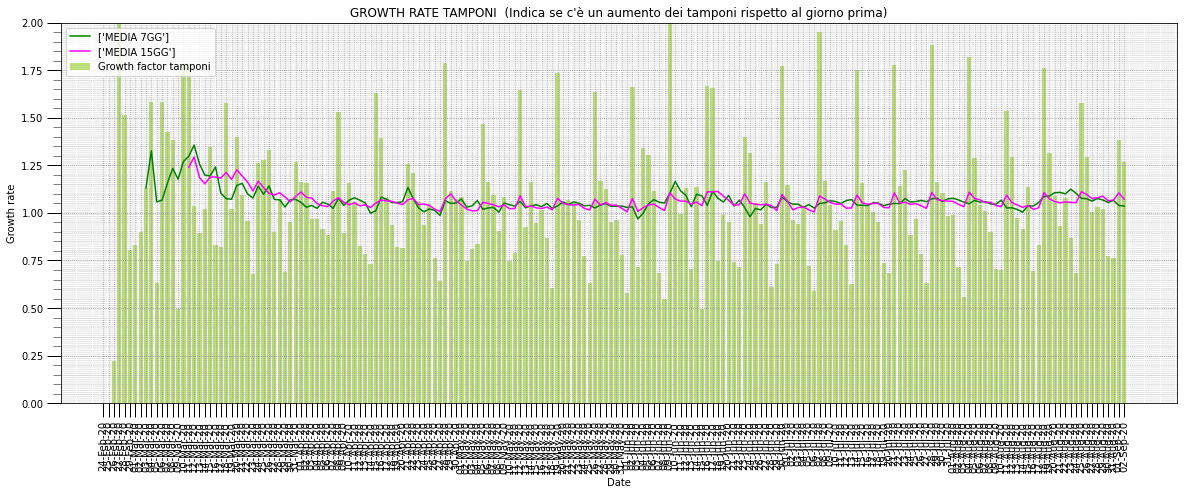

In [32]:
fig, ax = plt.subplots()

ax.bar(gf['data'], gf['gr_tamp'], label='Growth factor tamponi', color=COL_TAMPONI)
ax.plot(gf['data'], gf['avg_gf_tamp'], color=COL_AVG, label=['MEDIA 7GG'])
ax.plot(gf['data'], gf['avg_gf_tamp_15'], color='magenta', label=['MEDIA 15GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(0,2)
ax.set_title("GROWTH RATE TAMPONI  (Indica se c'è un aumento dei tamponi rispetto al giorno prima)")
ax.set_ylabel('Growth rate')
beautify_graph(ax)


Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]),

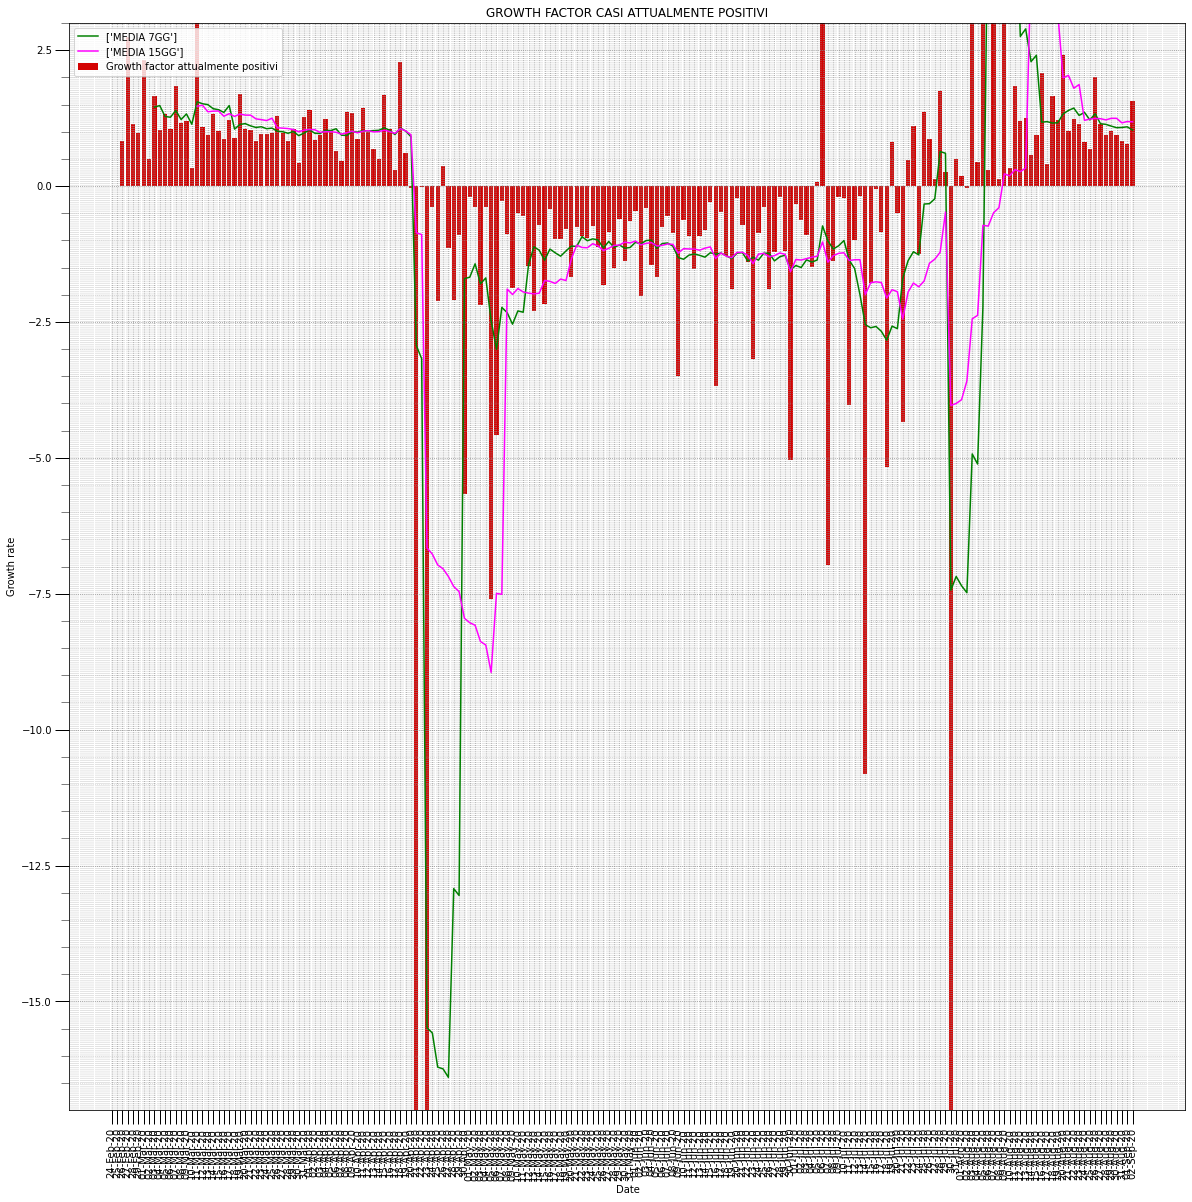

In [33]:
plt.rcParams['figure.figsize'] = [20, 20]
fig, ax = plt.subplots()


ax.bar(gf['data'], gf['gr_att_pos'], label='Growth factor attualmente positivi', color=COL_ATTUALMENTE_POSITIVI)
ax.plot(gf['data'], gf['avg_att_pos'], color=COL_AVG,label=['MEDIA 7GG'])
ax.plot(gf['data'], gf['avg_att_pos_15'], color='magenta',label=['MEDIA 15GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(-17,3)
ax.set_title("GROWTH FACTOR CASI ATTUALMENTE POSITIVI")
ax.set_ylabel('Growth rate')
beautify_graph(ax)

In [34]:
plt.rcParams['figure.figsize'] = [20, 7]

Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]),

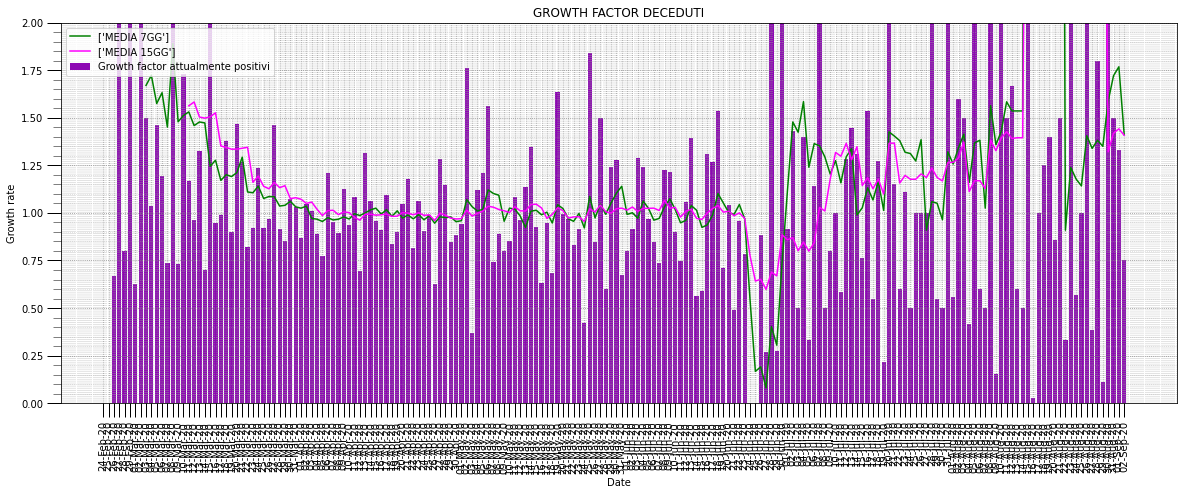

In [35]:
gf = pd.DataFrame()
gf['data'] = national_trend['data']
gf['deceduti'] = national_trend['deceduti']
gf['diff'] = gf['deceduti'] - gf['deceduti'].shift(1)
gf['gr'] = (gf['diff'] / gf['diff'].shift(1)).round(3)
gf['avg_gf'] = gf['gr'].rolling(7).mean().round(3)
gf['avg_gf15'] = gf['gr'].rolling(15).mean().round(3)

fig, ax = plt.subplots()

ax.bar(gf['data'], gf['gr'], label='Growth factor attualmente positivi', color=COL_DECEDUTI)
ax.plot(gf['data'], gf['avg_gf'], color=COL_AVG,label=['MEDIA 7GG'])
ax.plot(gf['data'], gf['avg_gf15'], color='magenta',label=['MEDIA 15GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(0,2)
ax.set_title("GROWTH FACTOR DECEDUTI")
ax.set_ylabel('Growth rate')
beautify_graph(ax)


Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1044 ticks ([-7.800000000000001, ..., 200.80000000000018]),

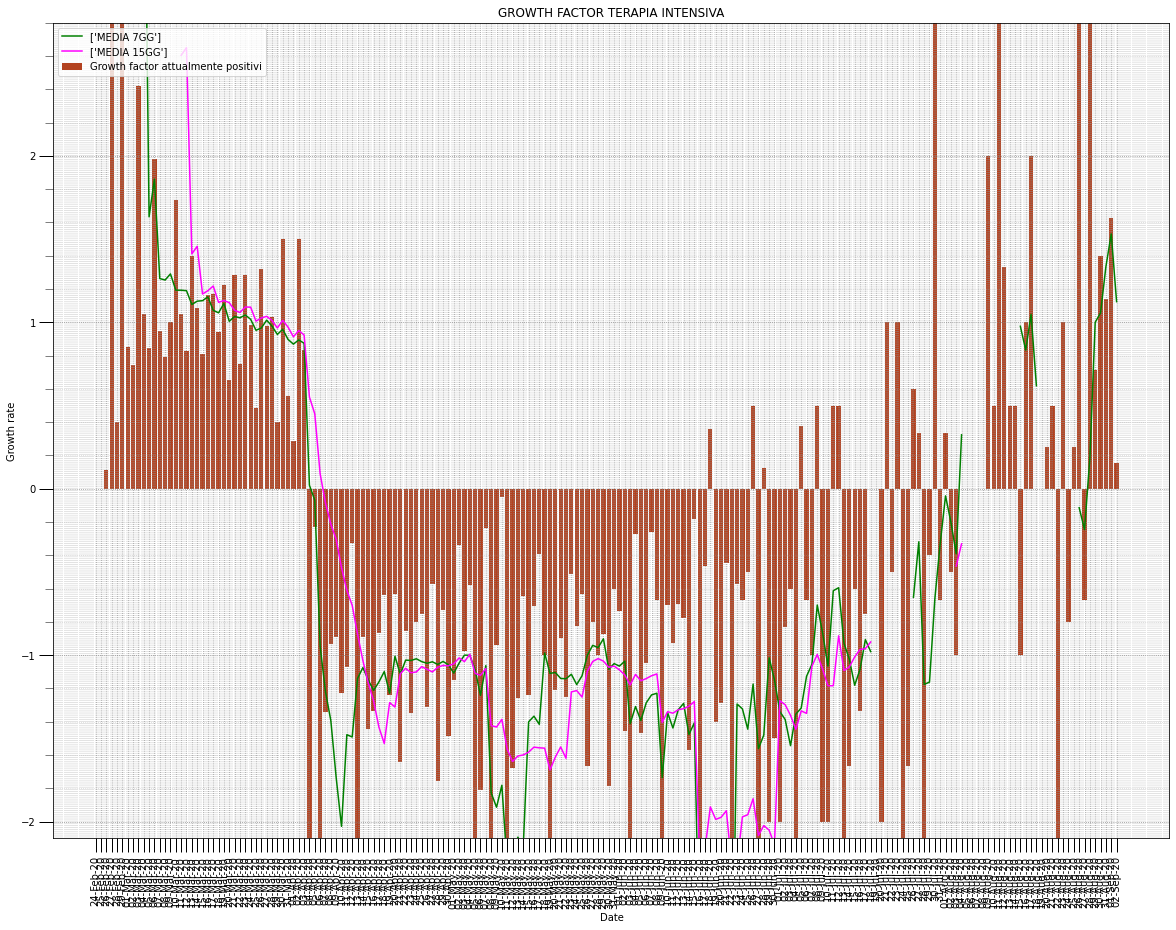

In [36]:
gf = pd.DataFrame()
gf['data'] = national_trend['data']
gf['terapia_intensiva'] = national_trend['terapia_intensiva']
gf['diff'] = gf['terapia_intensiva'] - gf['terapia_intensiva'].shift(1)
gf['gr'] = (gf['diff'] / abs(gf['diff'].shift(1))).round(3)
gf['avg_gf'] = gf['gr'].rolling(7).mean().round(3)
gf['avg_gf15'] = gf['gr'].rolling(15).mean().round(3)

plt.rcParams['figure.figsize'] = [20, 15]
fig, ax = plt.subplots()


ax.bar(gf['data'], gf['gr'], label='Growth factor attualmente positivi', color=COL_TERAPIA_INTENSIVA)
ax.plot(gf['data'], gf['avg_gf'], color=COL_AVG,label=['MEDIA 7GG'])
ax.plot(gf['data'], gf['avg_gf15'], color='magenta',label=['MEDIA 15GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(-2.1,2.8)
ax.set_title("GROWTH FACTOR TERAPIA INTENSIVA")
ax.set_ylabel('Growth rate')
beautify_graph(ax)
plt.rcParams['figure.figsize'] = [20, 7]

### Divisione percentuali dei casi
Un indicazione percentuale dei dati. La fotografia ad oggi (dall'inizio dell'epidemia italiana)

**Le percentuali giornaliere (dati giorno per giorno)**

In [37]:
percents_in_period = pd.DataFrame()
percents_in_period['data'] = incremental_data['data']
percents_in_period['ricoverati_con_sintomi'] = (incremental_data['ricoverati_con_sintomi'] / incremental_data['totale_casi'])*100
percents_in_period['terapia_intensiva'] = (incremental_data['terapia_intensiva'] / incremental_data['totale_casi'])*100
percents_in_period['isolamento_domiciliare'] = (incremental_data['isolamento_domiciliare'] / incremental_data['totale_casi'])*100
percents_in_period['dimessi_guariti'] = (incremental_data['dimessi_guariti'] / incremental_data['totale_casi'])*100
percents_in_period['deceduti'] = (incremental_data['deceduti'] / incremental_data['totale_casi'])*100
percents_in_period['contagi'] = growth_rates['nuovi_attualmente_positivi']
percents_in_period = percents_in_period[1:].round(2)

In [38]:
percents_in_period.tail(7).drop('data', axis=1).drop('contagi', axis=1).rename(
    columns={
        'ricoverati_con_sintomi':'RICOVERATI',
        'terapia_intensiva':'TER. INTENSIVA',
        'isolamento_domiciliare':'ISOLAMENTO DOMICILIARE',
        'dimessi_guariti':'GUARITI',
        'deceduti':'DECEDUTI'
    }
)

RICOVERATI  TER. INTENSIVA  ISOLAMENTO DOMICILIARE  GUARITI  \
                                                                         
27-Aug-20        5.39           -0.14                   78.42    15.97   
28-Aug-20        3.22            0.48                   71.85    23.84   
29-Aug-20       -0.69            0.35                   77.98    22.30   
30-Aug-20        6.08            0.51                   70.26    22.86   
31-Aug-20        3.71            0.80                   83.13    11.75   
01-Sep-20        9.44            1.33                   58.56    29.85   
02-Sep-20        4.30            0.15                   75.72    19.38   

           DECEDUTI  
                     
27-Aug-20      0.35  
28-Aug-20      0.62  
29-Aug-20      0.07  
30-Aug-20      0.29  
31-Aug-20      0.60  
01-Sep-20      0.82  
02-Sep-20      0.45

### Percentuali totali

In [39]:
percents_in_period.tail(10)

data  ricoverati_con_sintomi  terapia_intensiva  \
                                                                  
24-Aug-20  24-Aug-20                    7.76              -0.42   
25-Aug-20  25-Aug-20                    1.48               0.11   
26-Aug-20  26-Aug-20                   -0.22               0.22   
27-Aug-20  27-Aug-20                    5.39              -0.14   
28-Aug-20  28-Aug-20                    3.22               0.48   
29-Aug-20  29-Aug-20                   -0.69               0.35   
30-Aug-20  30-Aug-20                    6.08               0.51   
31-Aug-20  31-Aug-20                    3.71               0.80   
01-Sep-20  01-Sep-20                    9.44               1.33   
02-Sep-20  02-Sep-20                    4.30               0.15   

           isolamento_domiciliare  dimessi_guariti  deceduti  contagi  
                                                                       
24-Aug-20                   72.09            20.15      0.42   -19.04  
25-Aug-20                   57.65            40.30      0.46   -31.44  
26-Aug-20                   76.06            22.99      0.95   100.19  
27-Aug-20                   78.42            15.97      0.35    13.47  
28-Aug-20                   71.85            23.84      0.62    -6.45  
29-Aug-20                   77.98            22.30      0.07     1.63  
30-Aug-20                   70.26            22.86      0.29    -6.42  
31-Aug-20                   83.13            11.75      0.60   -16.78  
01-Sep-20                   58.56            29.85      0.82   -22.57  
02-Sep-20                   75.72            19.38      0.45    57.25

In [40]:
a="""plt.rcParams['figure.figsize'] = [20, 5]
fig, ax = plt.subplots()

plot = ['isolamento_domiciliare','dimessi_guariti','deceduti','ricoverati_con_sintomi','terapia_intensiva']
colors = [COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI,COL_RICOVERATI, COL_TERAPIA_INTENSIVA ]
labels = ['Isolamento Domiciliare','Guariti','Deceduti','Ricoverati con sintomi','Terapia Intensiva']

for i in range(len(plot)):
    plt.bar(percents_in_period['data'], percents_in_period[plot[i]], color=colors[i],label=labels[i])

ax.set_ylim(-20,100)
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_title("PERCENTUALE GIORNALIERA")
ax.set_ylabel('Percentuale')
beautify_graph(ax)
"""

**Le percentuali dall'inizio dell'epidemia**

In [41]:
percents_in_period = pd.DataFrame()
percents_in_period['data'] = national_trend['data']
percents_in_period['ricoverati_con_sintomi'] = (national_trend['ricoverati_con_sintomi'] / national_trend['totale_casi'])*100
percents_in_period['terapia_intensiva'] = (national_trend['terapia_intensiva'] / national_trend['totale_casi'])*100
percents_in_period['isolamento_domiciliare'] = (national_trend['isolamento_domiciliare'] / national_trend['totale_casi'])*100
percents_in_period['dimessi_guariti'] = (national_trend['dimessi_guariti'] / national_trend['totale_casi'])*100
percents_in_period['deceduti'] = (national_trend['deceduti'] / national_trend['totale_casi'])*100
percents_in_period['contagi'] = growth_rates['nuovi_attualmente_positivi']
percents_in_period = percents_in_period[1:].round(2)

Lo spaccato giorno per giorno percentuale. Da qui si evidenzia come si evolve l'andamento percencentuale dell'epidemia. In basso (in verde) il grafico del Growth Rate di ogni giorno rispetto al giorno precedente. Per capire come si evolvono le percentuali in base all'aumento o la diminuzione dei nuovi casi.

In [42]:
percents_in_period.tail(7).drop('data', axis=1).drop('contagi', axis=1).rename(
    columns={
        'ricoverati_con_sintomi':'RICOVERATI',
        'terapia_intensiva':'TER. INTENSIVA',
        'isolamento_domiciliare':'ISOLAMENTO DOMICILIARE',
        'dimessi_guariti':'GUARITI',
        'deceduti':'DECEDUTI'
    }
)

RICOVERATI  TER. INTENSIVA  ISOLAMENTO DOMICILIARE  GUARITI  \
                                                                         
27-Aug-20        0.43            0.03                    7.86    78.26   
28-Aug-20        0.44            0.03                    8.21    77.96   
29-Aug-20        0.44            0.03                    8.58    77.65   
30-Aug-20        0.47            0.03                    8.90    77.38   
31-Aug-20        0.48            0.03                    9.17    77.13   
01-Sep-20        0.51            0.04                    9.35    76.96   
02-Sep-20        0.53            0.04                    9.68    76.68   

           DECEDUTI  
                     
27-Aug-20     13.44  
28-Aug-20     13.37  
29-Aug-20     13.29  
30-Aug-20     13.23  
31-Aug-20     13.18  
01-Sep-20     13.14  
02-Sep-20     13.07

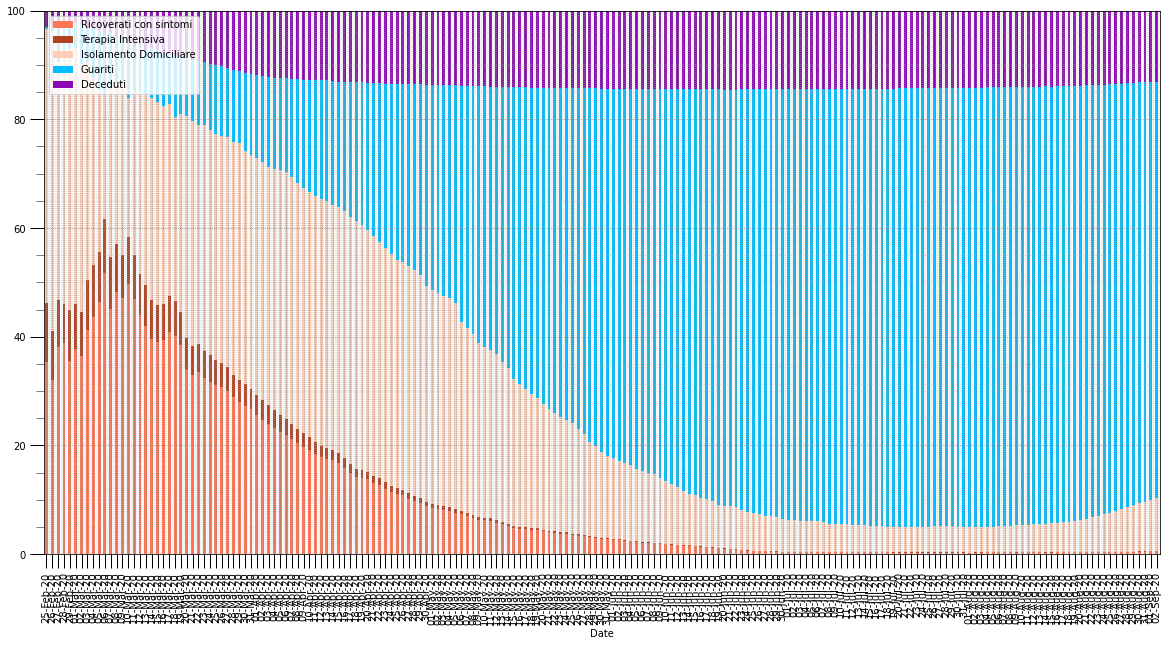

In [43]:
# %matplotlib notebook
plt.rcParams['figure.figsize'] = [20, 10]

plot = ['ricoverati_con_sintomi','terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
labels = ['Ricoverati con sintomi','Terapia Intensiva','Isolamento Domiciliare','Guariti','Deceduti']
ax = percents_in_period.plot(kind='bar', x='data', y=plot, color=colors, rot=90, label=labels, stacked=True)
ax.set_ylim(0,100)

beautify_graph(ax)


## DATI REGIONALI

In [44]:
regional_trend_read = pd.read_csv(os.path.join(REPO_DIR,'dati-regioni/dpc-covid19-ita-regioni.csv'))
regional_trend_read['totale_attualmente_positivi'] = regional_trend_read['totale_positivi']
regional_trend_read['nuovi_attualmente_positivi'] = regional_trend_read['variazione_totale_positivi']
regional_trend_read['DATA'] = pd.to_datetime(regional_trend_read['data']).dt.strftime('%d-%b-%y')
regional_trend_read['data'] = pd.to_datetime(regional_trend_read['data']).dt.strftime('%d-%b-%y')



In [45]:
#regional_trend.set_index(keys=['DATA'], append=False, inplace=True)
#regional_trend.index.rename('', inplace=True)


regions = regional_trend_read.denominazione_regione.unique()
regions_data = {}

for r in regions:
    data = regional_trend_read[regional_trend_read['denominazione_regione']==r]
    data.set_index(keys=['data'], append=False, inplace=True)
    regions_data[r]=data


In [46]:
#media_7_giorni =casi_tampone.rolling(7).mean().round(2)
region_colors = ['#505cf7','#e688b5','#e688b5','#791d9f','#17652e','#76f384',\
          '#bd3089','#5c4566','#3b6712','#bb90bf','#549bb5','#a674cc',\
          '#345a48','#dc9615','#51294a','#0446ca','#96bf9b','#c20cb2',\
          '#acc7fb','#ecdab7','#bbfc5f'
         ]


In [47]:
plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti','nuovi_attualmente_positivi']

regional_datas = {x:pd.DataFrame() for x in plot}

for p in plot:
    for i,r in enumerate(regions):
        regional_datas[p][r]= regions_data[r][p]



### Totale Casi per Regione

In [48]:
regional_datas['totale_casi'].iloc[-1:,0:10]

Abruzzo  Basilicata  Calabria  Campania  Emilia-Romagna  \
data                                                                 
02-Sep-20     3804         526      1545      7285           32128   

           Friuli Venezia Giulia  Lazio  Liguria  Lombardia  Marche  
data                                                                 
02-Sep-20                   3806  11446    11017     100554    7273

In [49]:
regional_datas['totale_casi'].iloc[-1:,10:]

Molise  P.A. Bolzano  P.A. Trento  Piemonte  Puglia  Sardegna  \
data                                                                       
02-Sep-20     528          2958         5132     32989    5546      2316   

           Sicilia  Toscana  Umbria  Valle d'Aosta  Veneto  
data                                                        
02-Sep-20     4433    11967    1830           1243   23189

### Nuovi Casi Per Regione

In [50]:
incremental_data_regional = pd.DataFrame()
incremental_columns = ['totale_casi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'totale_attualmente_positivi','tamponi']

n = regional_datas['totale_casi']
for c in n.columns:
    incremental_data_regional[c] = n[c] - n[c].shift(1)
    incremental_data_regional[c] = incremental_data_regional[c].astype(pd.Int64Dtype())

incremental_data_regional = incremental_data_regional[1:]

In [51]:

incremental_data_regional.iloc[-7:,0:10]

Abruzzo  Basilicata  Calabria  Campania  Emilia-Romagna  \
data                                                                 
27-Aug-20       18           6         6       130             171   
28-Aug-20       20           4        10       183             162   
29-Aug-20       14           5        11       188             149   
30-Aug-20       34           1        34       270             109   
31-Aug-20        4           0        14       184             117   
01-Sep-20        3           0        22       102              99   
02-Sep-20       24           2        32       117             107   

           Friuli Venezia Giulia  Lazio  Liguria  Lombardia  Marche  
data                                                                 
27-Aug-20                     25    152       37        286      61  
28-Aug-20                     19    166       46        316      17  
29-Aug-20                     20    171       47        289      12  
30-Aug-20                     16    156       53        235      15  
31-Aug-20                      5    148       44        135       2  
01-Sep-20                     17    125       19        242      16  
02-Sep-20                     20    130       47        237      17

In [52]:

incremental_data_regional.iloc[-7:,10:]

Molise  P.A. Bolzano  P.A. Trento  Piemonte  Puglia  Sardegna  \
data                                                                       
27-Aug-20       1             9           15        88      47        55   
28-Aug-20       1             8           16        91      51        55   
29-Aug-20       2             9           14        90      65        70   
30-Aug-20       1             8            8        60      69        22   
31-Aug-20       0             3            4        37      38        79   
01-Sep-20       3            13            3        42      39        50   
02-Sep-20       0            10           33        66      67        73   

           Sicilia  Toscana  Umbria  Valle d'Aosta  Veneto  
data                                                        
27-Aug-20       50       99      20              1     132  
28-Aug-20       54       82      22              2     135  
29-Aug-20       29       92      12              4     151  
30-Aug-20       34       98      31              2     109  
31-Aug-20       26       73       9              9      65  
01-Sep-20       33       40      10              0      97  
02-Sep-20       83       69      27              2     163

### Totale Attualmente Positivi per Regione

In [53]:
regional_datas['totale_attualmente_positivi'].iloc[-1:,0:10]

Abruzzo  Basilicata  Calabria  Campania  Emilia-Romagna  \
data                                                                 
02-Sep-20      430          90       290      2402            3103   

           Friuli Venezia Giulia  Lazio  Liguria  Lombardia  Marche  
data                                                                 
02-Sep-20                    387   3407      607       7278     320

In [54]:
regional_datas['totale_attualmente_positivi'].iloc[-1:,10:]

Molise  P.A. Bolzano  P.A. Trento  Piemonte  Puglia  Sardegna  \
data                                                                       
02-Sep-20      73           206          123      1521     922       909   

           Sicilia  Toscana  Umbria  Valle d'Aosta  Veneto  
data                                                        
02-Sep-20     1227     1636     298             32    2556

### Nuovi Positivi per Regione

In [55]:
regional_datas['nuovi_attualmente_positivi'].iloc[-7:,0:10]

Abruzzo  Basilicata  Calabria  Campania  Emilia-Romagna  \
data                                                                 
27-Aug-20       15           6         6       128             166   
28-Aug-20        2           3        10       173             154   
29-Aug-20       12           4         9       175             148   
30-Aug-20       34           1        34       254              99   
31-Aug-20       -2           0        13       185             109   
01-Sep-20      -21           0        21        82              84   
02-Sep-20       24           2        24       110              42   

           Friuli Venezia Giulia  Lazio  Liguria  Lombardia  Marche  
data                                                                 
27-Aug-20                     14    143       18        256      42  
28-Aug-20                     12    161       11        229       8  
29-Aug-20                      1    166       24        191       5  
30-Aug-20                     12    153       16        184       6  
31-Aug-20                      5    139       32        123      -4  
01-Sep-20                     12    111       19        130      11  
02-Sep-20                     10    122       47        196      11

In [56]:
regional_datas['nuovi_attualmente_positivi'].iloc[-7:,10:]

Molise  P.A. Bolzano  P.A. Trento  Piemonte  Puglia  Sardegna  \
data                                                                       
27-Aug-20       1             7           14        73      40        55   
28-Aug-20       1             4           13        65      47        54   
29-Aug-20       2             1           10        37      64        69   
30-Aug-20       1             0            3        22      69        21   
31-Aug-20       0             0            4        27      27        77   
01-Sep-20       3            11            1        32      16        48   
02-Sep-20       0             5           31        57      62        72   

           Sicilia  Toscana  Umbria  Valle d'Aosta  Veneto  
data                                                        
27-Aug-20       39       82      10              1      63  
28-Aug-20       39       76       7              2      32  
29-Aug-20       26       72       9              4      92  
30-Aug-20       30       82      24              4       0  
31-Aug-20       11       71       6              8      42  
01-Sep-20       27        7      10             -1      73  
02-Sep-20       75       55      20              2      96

### Terapia intensiva

In [57]:
regional_datas['terapia_intensiva'].iloc[-7:,:10]

Abruzzo  Basilicata  Calabria  Campania  Emilia-Romagna  \
data                                                                 
27-Aug-20        1           0         0         4               8   
28-Aug-20        1           1         0         5               9   
29-Aug-20        1           1         0         2              10   
30-Aug-20        1           1         0         4              11   
31-Aug-20        1           1         0         1               9   
01-Sep-20        1           1         0         6               9   
02-Sep-20        1           1         0         4              10   

           Friuli Venezia Giulia  Lazio  Liguria  Lombardia  Marche  
data                                                                 
27-Aug-20                      0      6        0         14       0  
28-Aug-20                      0      6        0         17       1  
29-Aug-20                      0      8        1         18       1  
30-Aug-20                      1      7        1         20       1  
31-Aug-20                      2      7        1         22       1  
01-Sep-20                      2      8        5         21       1  
02-Sep-20                      3      9        6         22       1

In [58]:
regional_datas['terapia_intensiva'].iloc[-7:,10:]

Molise  P.A. Bolzano  P.A. Trento  Piemonte  Puglia  Sardegna  \
data                                                                       
27-Aug-20       0             1            1         6       3         2   
28-Aug-20       0             1            1         6       5         2   
29-Aug-20       0             2            1         5       5         2   
30-Aug-20       0             2            1         5       5         3   
31-Aug-20       0             2            1         7       7         4   
01-Sep-20       0             2            1         7       7         6   
02-Sep-20       0             2            1         7       6         5   

           Sicilia  Toscana  Umbria  Valle d'Aosta  Veneto  
data                                                        
27-Aug-20       10        5       1              0       5  
28-Aug-20        9        4       0              0       6  
29-Aug-20       10        5       1              0       6  
30-Aug-20       10        5       1              0       7  
31-Aug-20       10        8       2              0       8  
01-Sep-20       10        9       2              0       9  
02-Sep-20       12        8       2              0       9

## Andamento per regione

Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.3999999999992

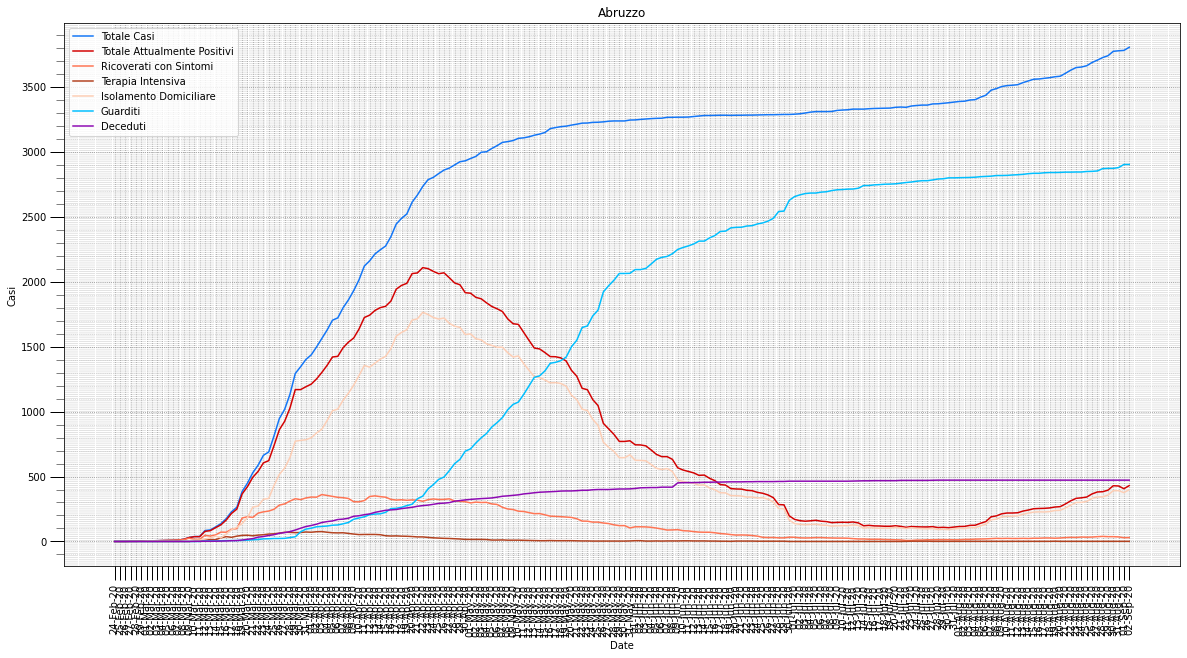

Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.3999999999992

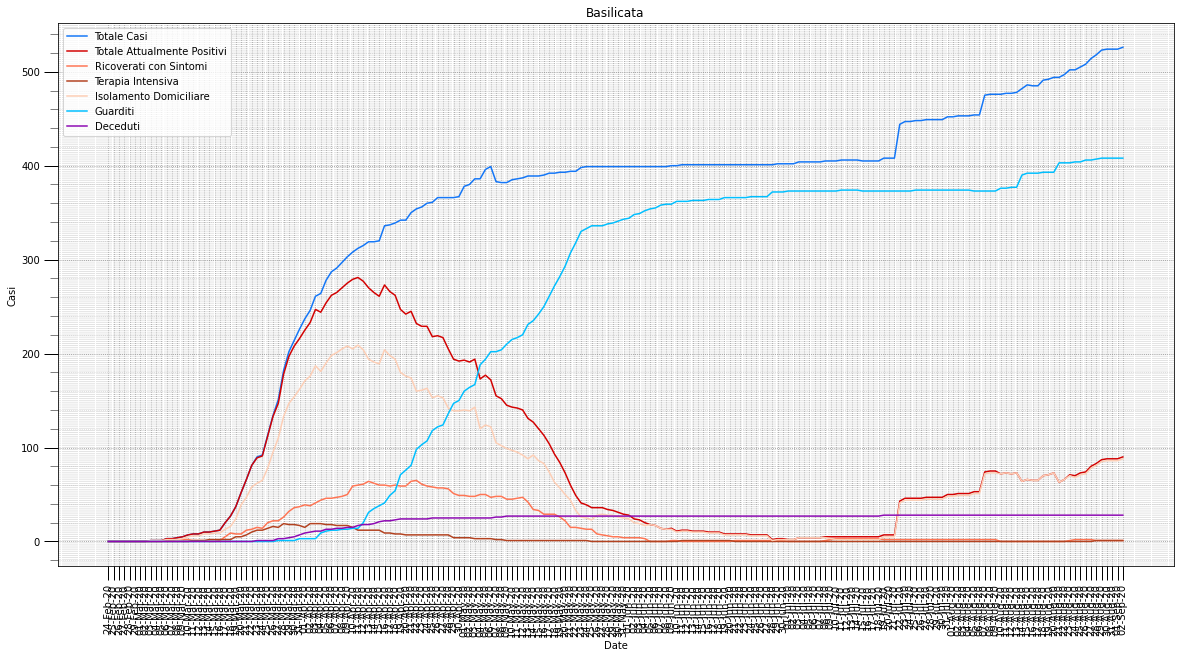

Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.3999999999992

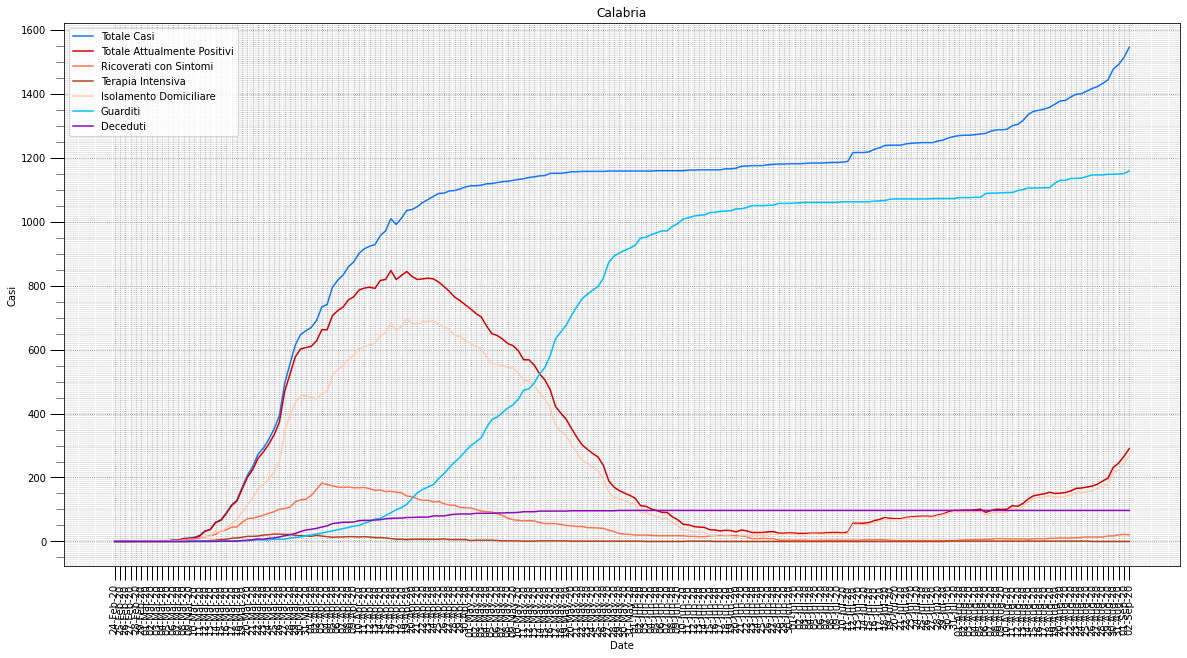

Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.3999999999992

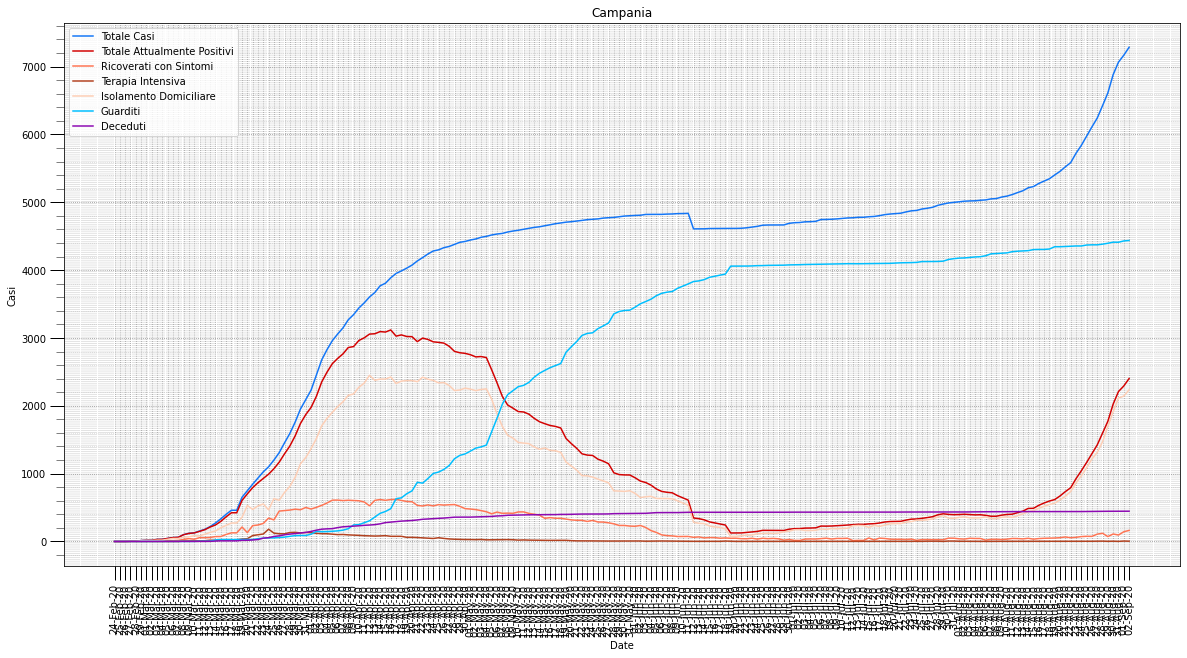

Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.3999999999992

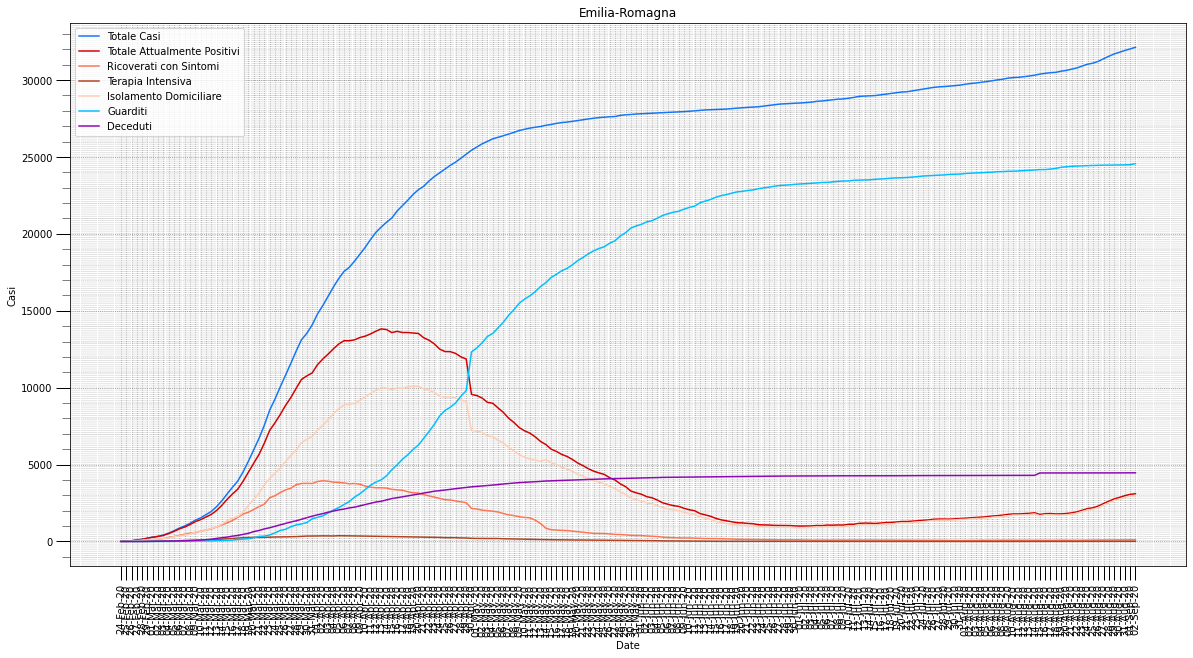

Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.3999999999992

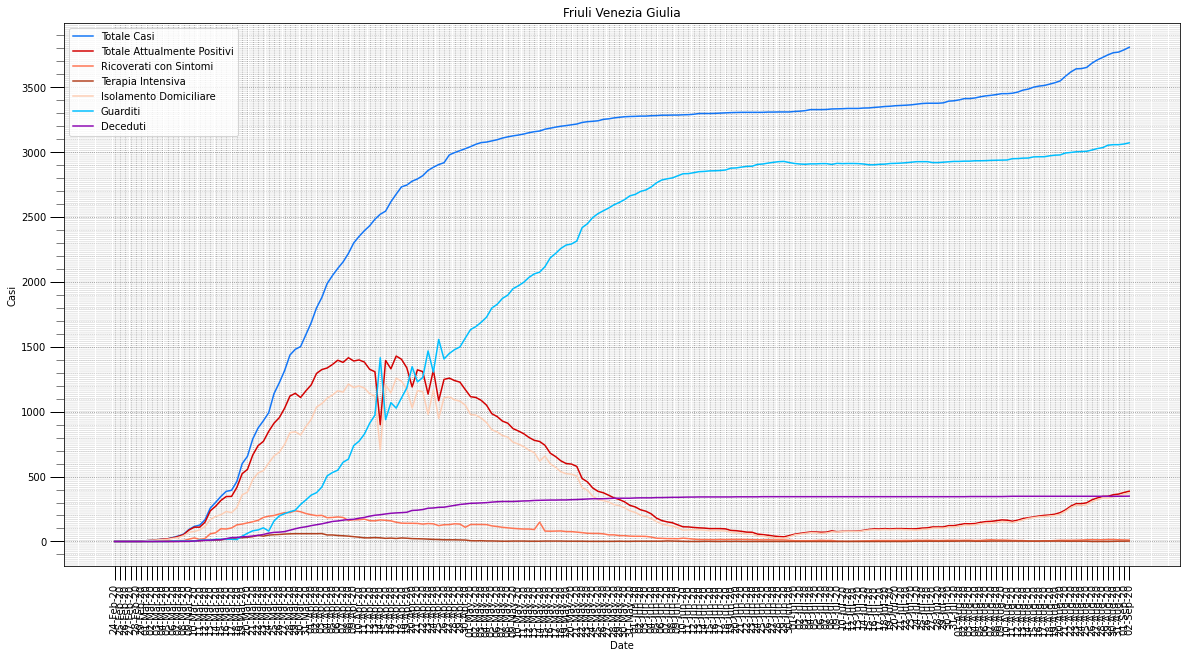

Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.3999999999992

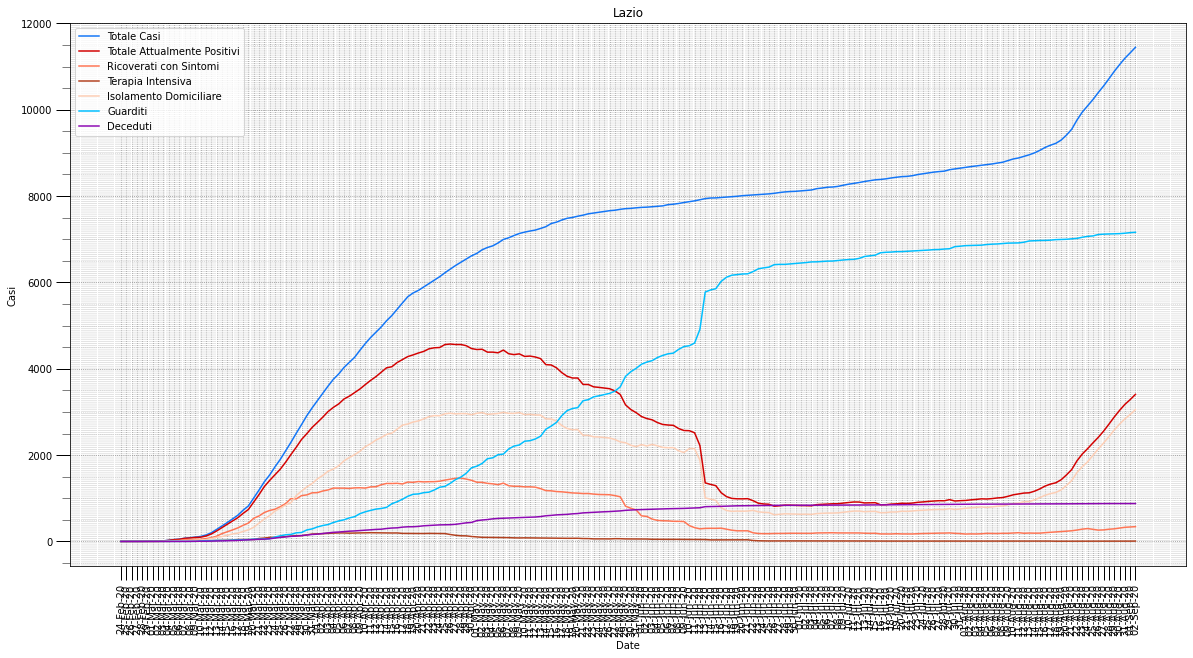

Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.3999999999992

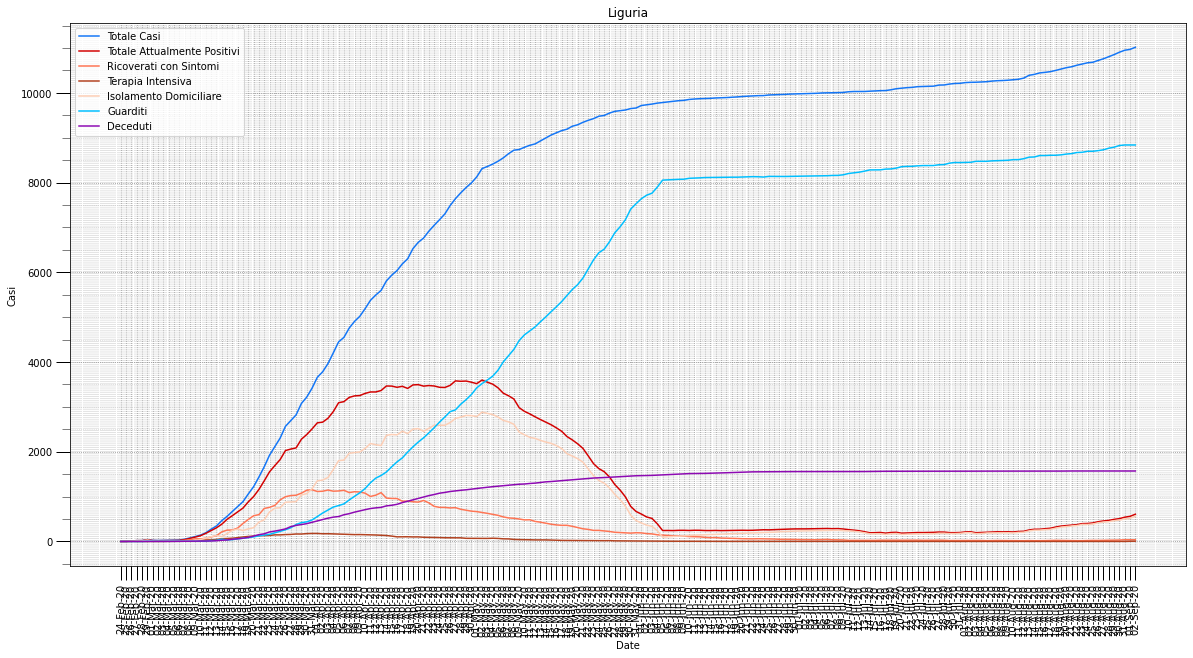

Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.3999999999992

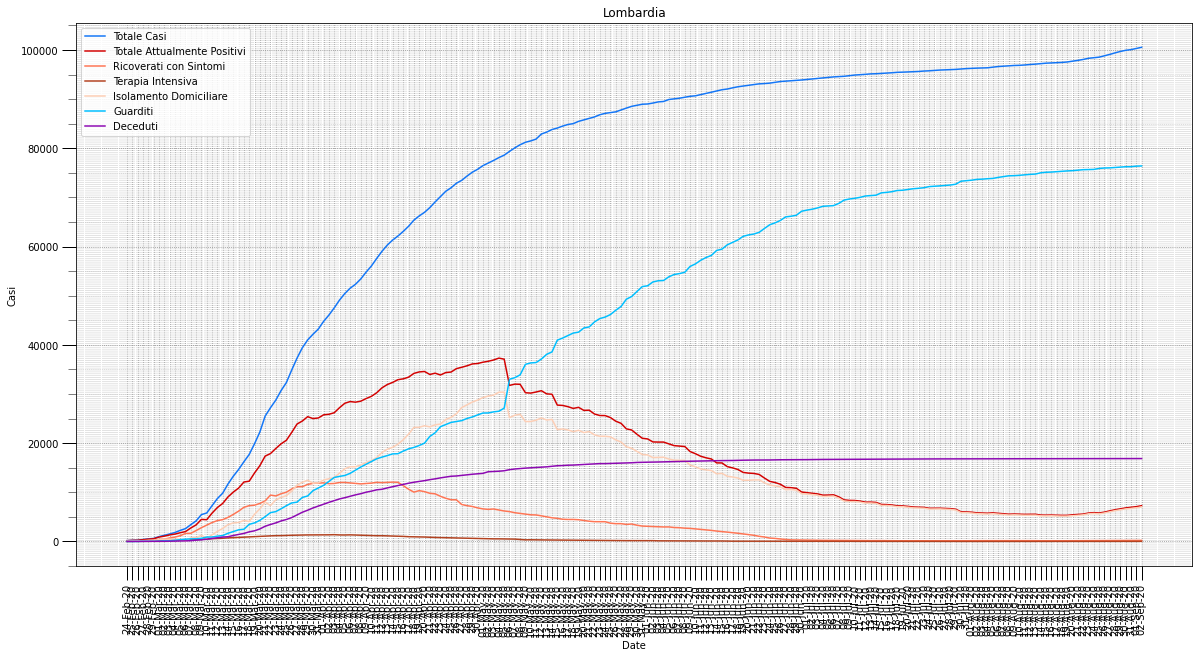

Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.3999999999992

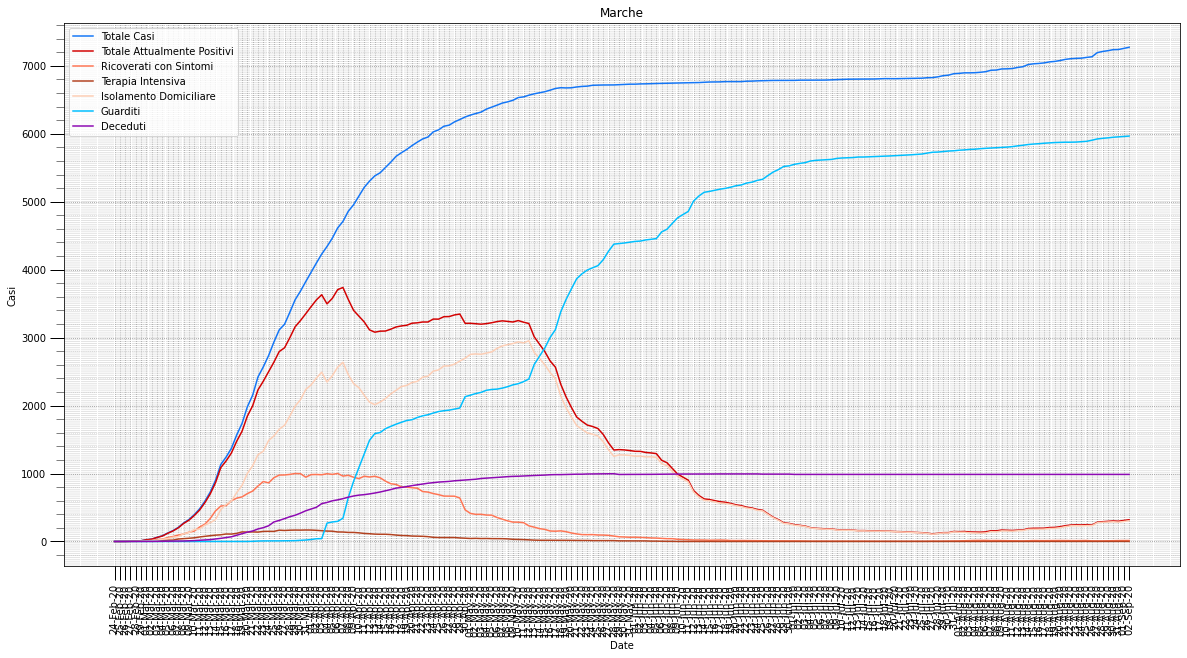

In [59]:

plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i,r in enumerate(regions[:10]):
    fig, ax = plt.subplots()
    for j,p in enumerate(plot):
        plt.plot(regions_data[r].index, regions_data[r][p], color=colors[j], label=legends[j])
    ax.set_title(r)
    ax.set_ylabel('Casi')
    ax.set_xticklabels(regions_data[r].index, rotation=90)    
    beautify_graph(ax)

Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.3999999999992

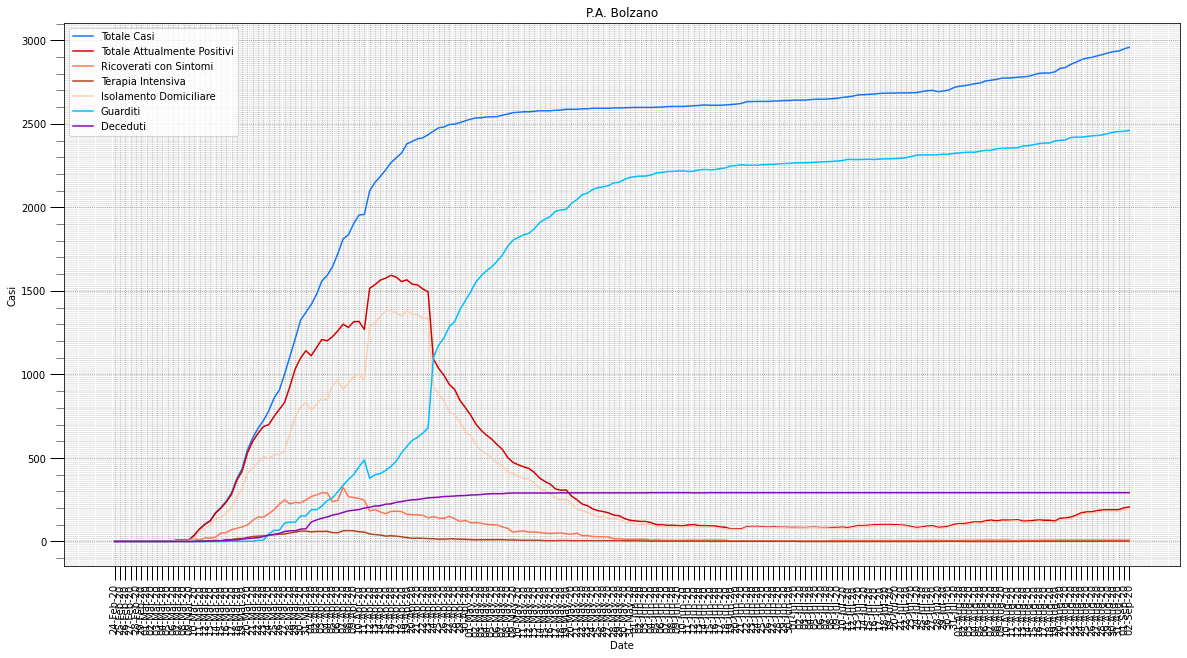

Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.3999999999992

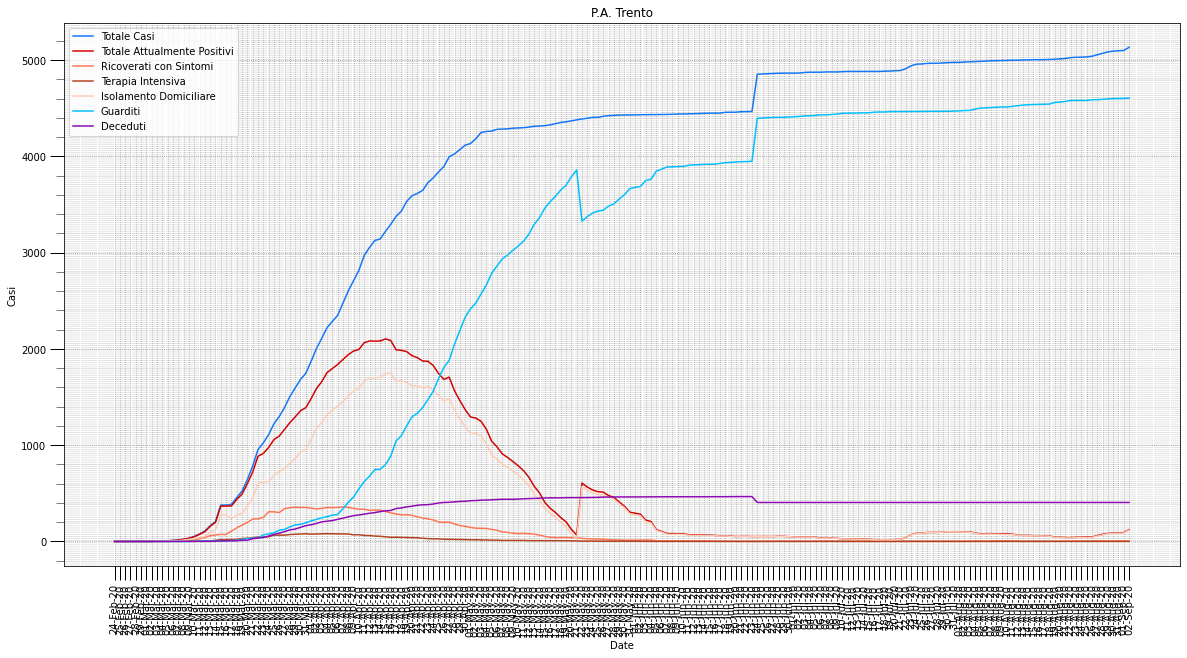

Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.3999999999992

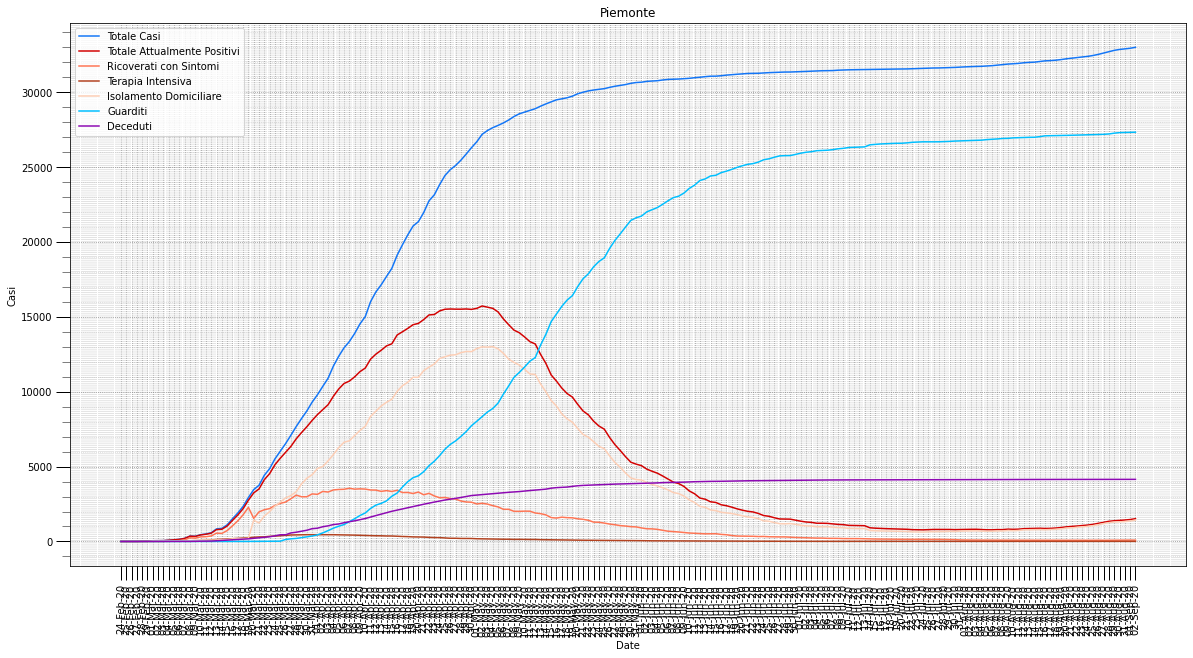

Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.3999999999992

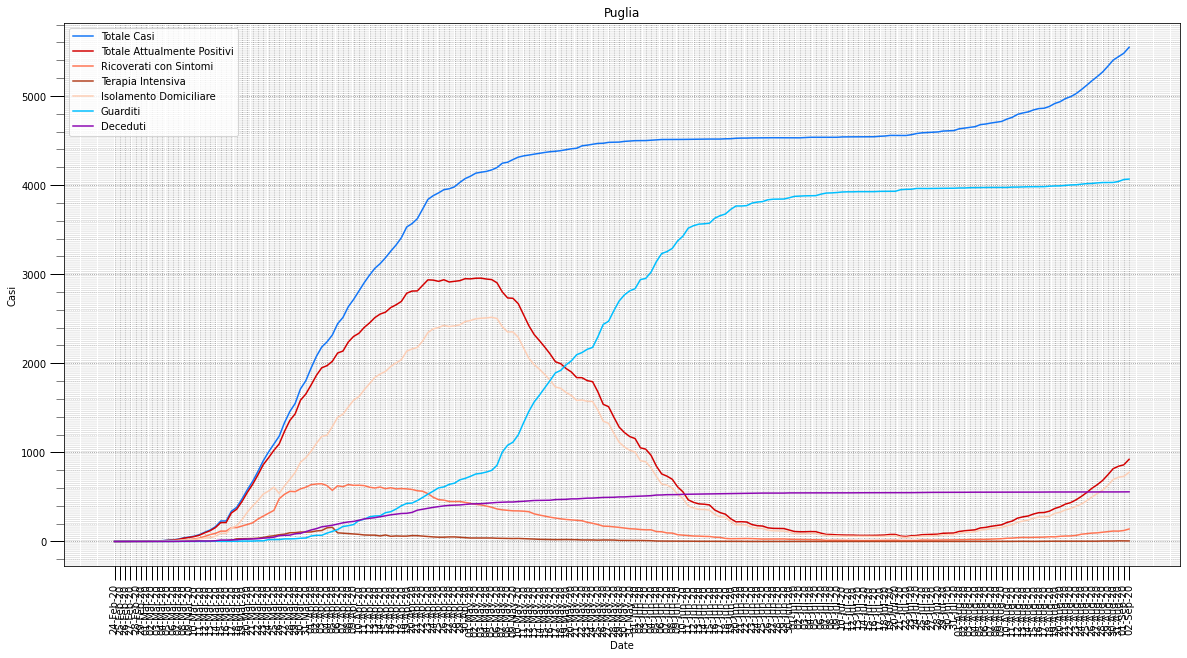

Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.3999999999992

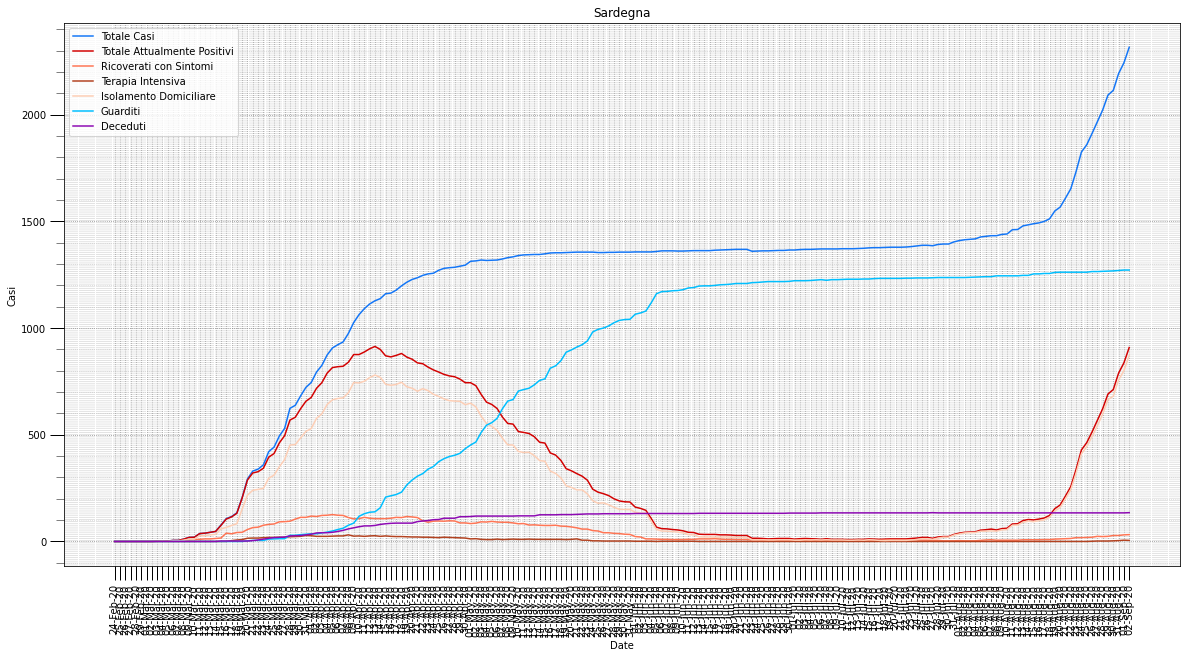

Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.3999999999992

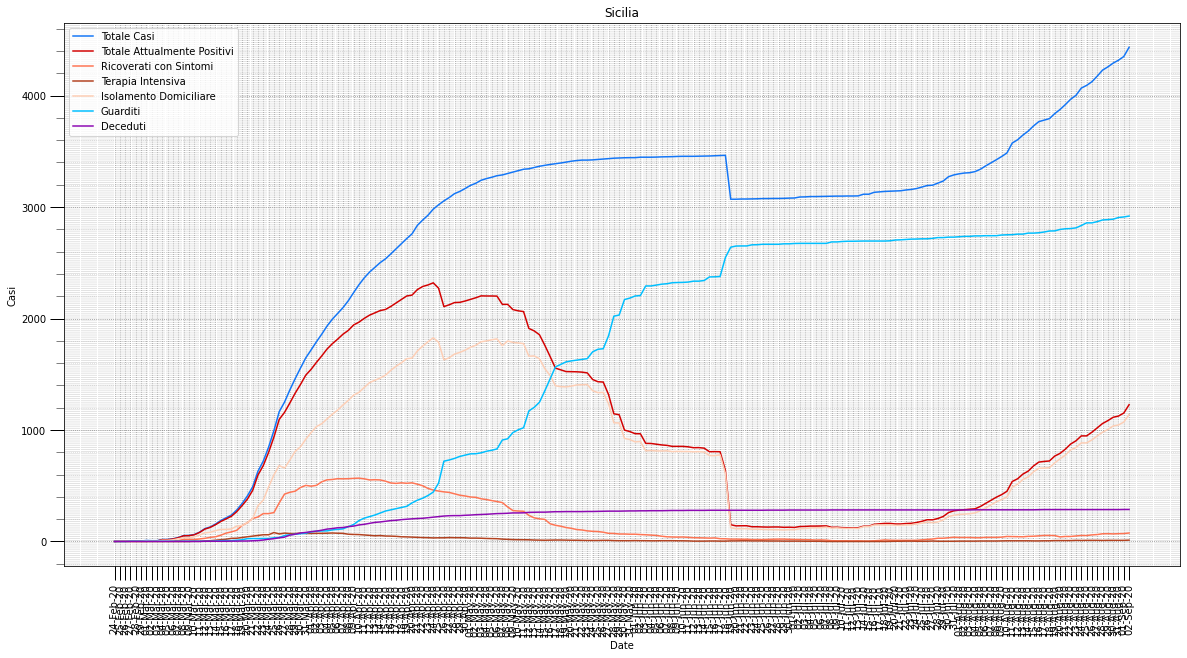

Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.3999999999992

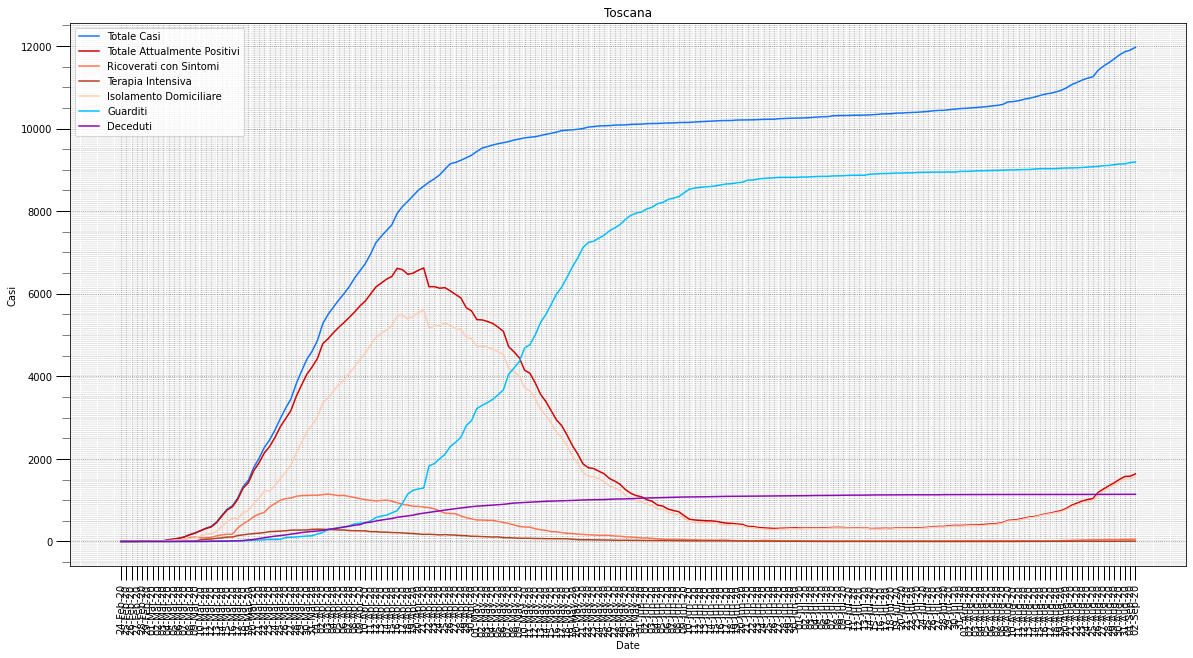

Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.3999999999992

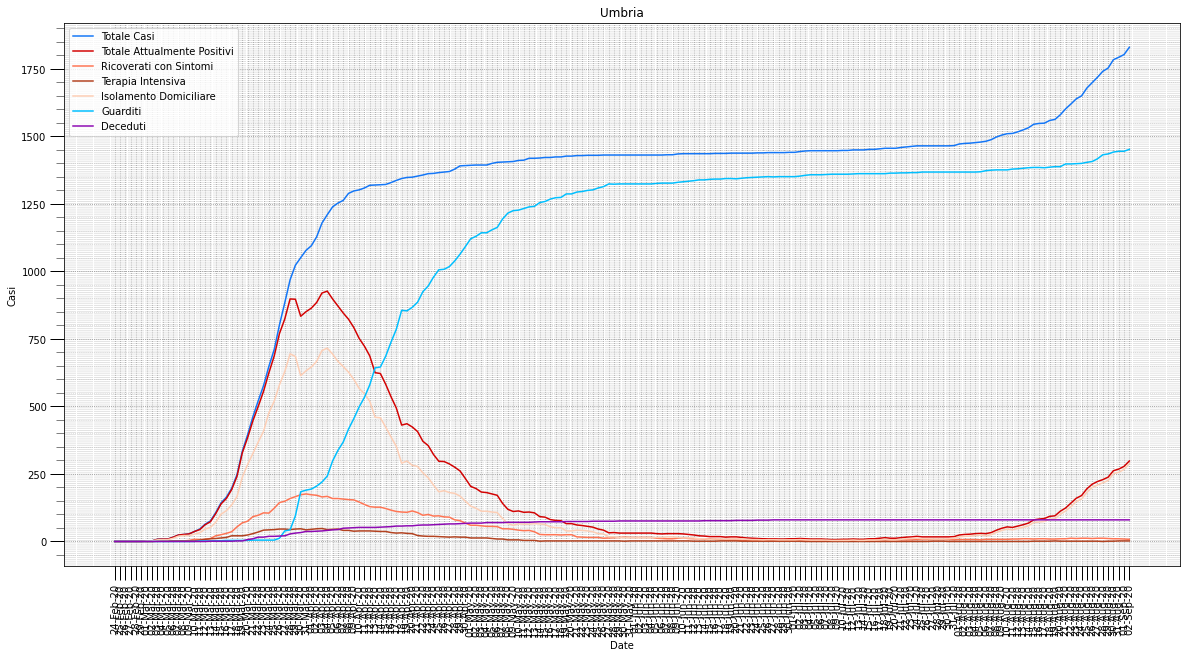

Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.3999999999992

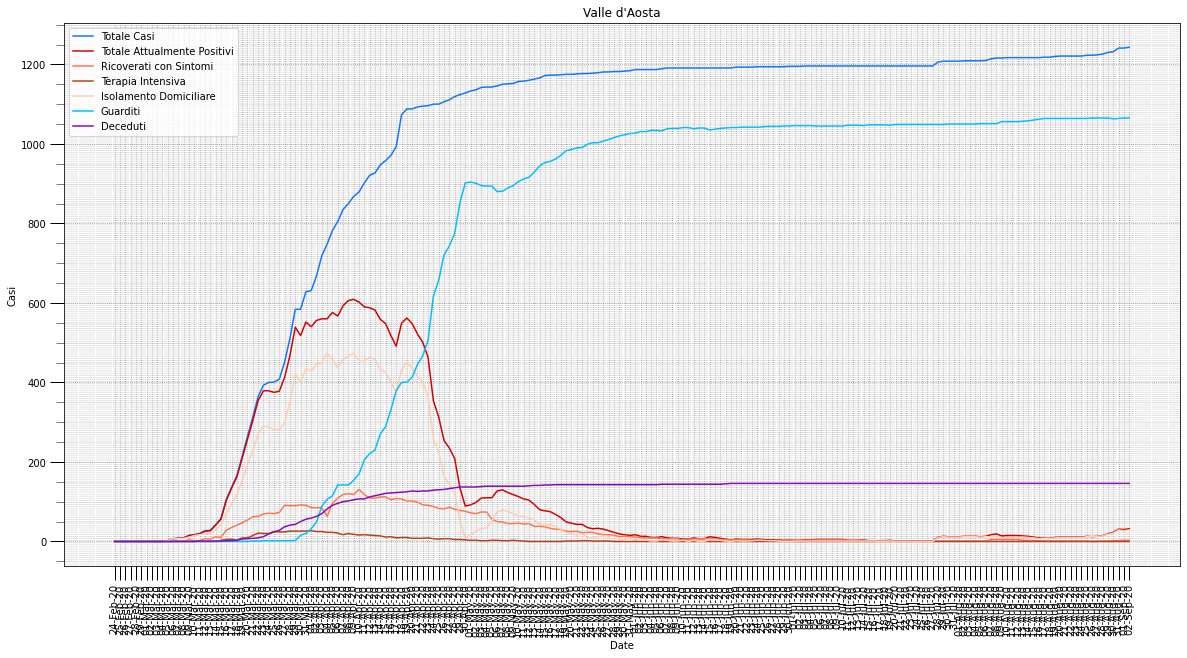

Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.39999999999924]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1050 ticks ([-9.4, ..., 200.3999999999992

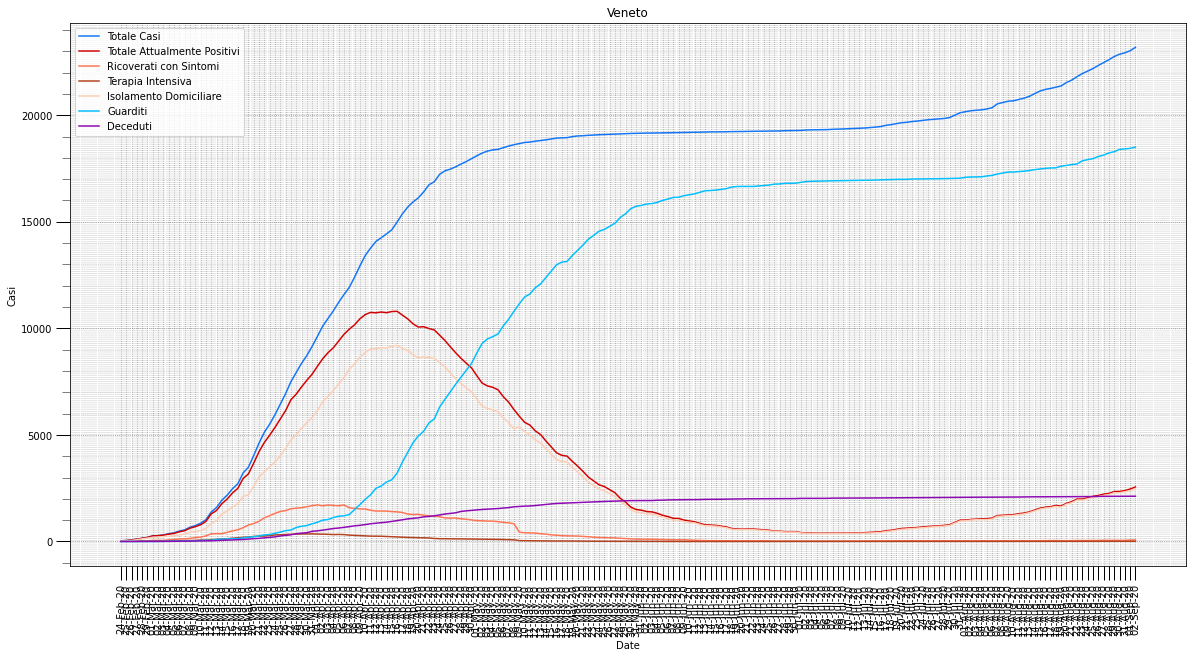

In [60]:

plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i,r in enumerate(regions[11:]):
    fig, ax = plt.subplots()
    for j,p in enumerate(plot):
        plt.plot(regions_data[r].index, regions_data[r][p], color=colors[j], label=legends[j])
    ax.set_title(r)
    ax.set_ylabel('Casi')
    ax.set_xticklabels(regions_data[r].index, rotation=90)    
    beautify_graph(ax)